## Proyecto I - Minería de datos


### Nicolás Echeverri Rojas, Leidy Catalina Millán, Anlly Velez


### Questions

- If the company has details (data, logs etc) on all the "alarms" in the year 2012 - 2015, it wants to predicts how many alarms   in each store in each month will happen in 2016 ???
- why?
 
- which shops has largest smallest number of alarms (maybe normalize per size of the shop)
- what data would you suggest the manager to collect to make the dataset more complete
  report and ask questions
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('display.max_columns', None)


import matplotlib
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [2]:
df=pd.read_csv('CPT_PREDICTIVE_PPM.csv', encoding= 'unicode_escape')

C:\Users\nico0\AppData\Local\Temp\ipykernel_10104\1262930.py:1: DtypeWarning: Columns (9,12,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('CPT_PREDICTIVE_PPM.csv', encoding= 'unicode_escape')


In [3]:
df.head(2)

,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status
0,12904684,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 10:00,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567391,Frozen Food (-18C or less),HALF GLASS DOOR & WELL,In Service
1,12904685,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 09:59,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567398,Frozen Food (-18C or less),FULL GLASS DOOR,In Service


## 2. Limpieza de datos

## 2.1 Observando si existen valores duplicados 

In [4]:
df[df.duplicated()]

,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609989 entries, 0 to 609988
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Work Order Number          609989 non-null  int64  
 1   Site Number                609989 non-null  object 
 2   Site Type                  609989 non-null  object 
 3   Date Created               609989 non-null  object 
 4   Date Completed             577602 non-null  object 
 5   Provider Name              609989 non-null  object 
 6   WO Current Status          609989 non-null  object 
 7   Asset Category             609989 non-null  object 
 8   Problem Type Name          609989 non-null  object 
 9   Requested By               527644 non-null  object 
 10  WO Priority                609989 non-null  object 
 11  Manufacturer               609989 non-null  object 
 12  Asset In-Service Date      506751 non-null  object 
 13  Level 1 Organization Name  60

## 3. Predicción de alarmas los supermercados con mayor cantidad de alarmas

In [31]:
nameMostCountsPerSiteNumber

Index(['total', 'A0815', 'A0440', 'A0670', 'A0052', 'A0069'], dtype='object')

In [32]:
df_site_number_TS_Unstacked.to_csv("data_per_supermarker.csv")

## 3.1 Probando con A0052

In [103]:
name_supermarker = 'A0052'

df_supermarker = df_site_number_TS_Unstacked[[name_supermarker]]
df_supermarker.columns.name = None #Elimna el multiindex

In [104]:
df_supermarker

,A0052
Date Created,
2012-02-01 03:00:00,0.0
2012-02-01 05:00:00,0.0
2012-02-01 06:00:00,0.0
2012-02-01 08:00:00,0.0
2012-02-01 13:00:00,0.0
...,...
2015-11-01 16:00:00,0.0
2015-11-01 17:00:00,0.0
2015-11-01 18:00:00,0.0


Text(0.5, 1.0, 'Número de alarmas supermercado A0052')

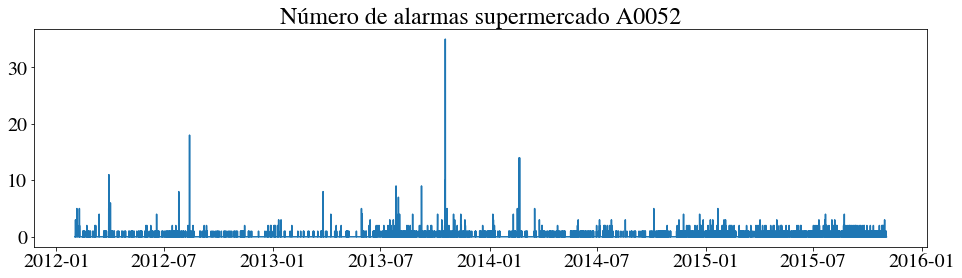

In [107]:
plt.figure(figsize=(16,4))
plt.plot(df_supermarker[name_supermarker])
plt.title(f"Número de alarmas supermercado {name_supermarker}")

In [108]:
df_supermarker[name_supermarker].value_counts()

0.0     30563
1.0      1660
2.0       189
3.0        32
4.0        24
5.0        11
8.0         3
7.0         3
9.0         2
14.0        2
11.0        1
6.0         1
18.0        1
10.0        1
35.0        1
12.0        1
Name: A0052, dtype: int64

### Se suma el número de alarmas por día con el fin de solventar la irregularidad en el reporte de alarmas por hora

In [109]:
df_1d = df_supermarker.reset_index().groupby(by= pd.Grouper(key='Date Created',freq='1d') )[[name_supermarker]].sum()

In [110]:
df_1d 

,A0052
Date Created,
2012-02-01,0.0
2012-02-02,5.0
2012-02-03,0.0
2012-02-04,9.0
2012-02-05,0.0
...,...
2015-10-28,5.0
2015-10-29,6.0
2015-10-30,4.0


Text(0.5, 1.0, 'Número de alarmas por día supermercado A0052')

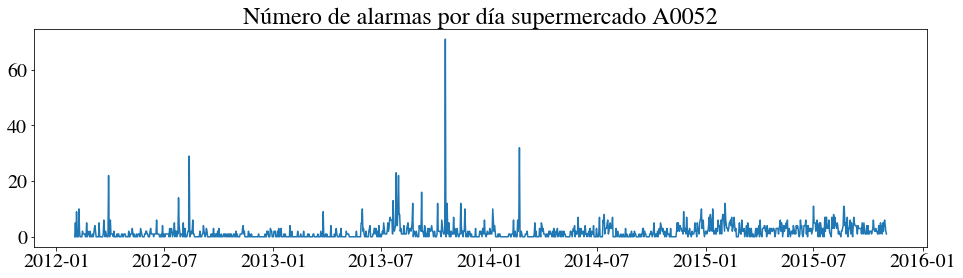

In [112]:
plt.figure(figsize=(16,4))
plt.plot(df_1d , label ='freq')
plt.title(f"Número de alarmas por día supermercado {name_supermarker}")
#plt.ylim(150,170)

## 3.2 Aplicando media movil para 30 días

Se aplica la transformación de media movil debido a los cambios tan abruptos en el número de alarmas con el fin de suavizar la serie de tiempo

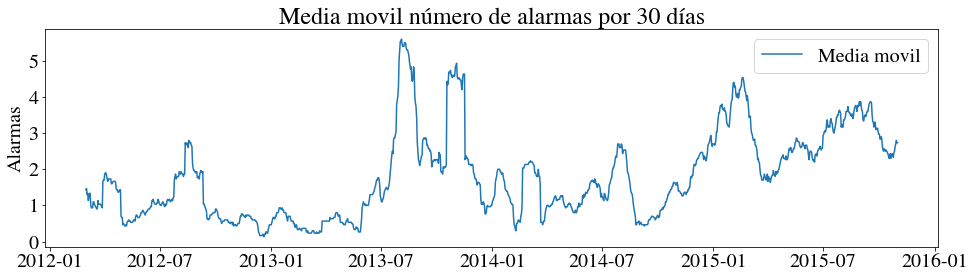

In [46]:
df_rolling = df_1d[[name_supermarker]].rolling(30).mean()

plt.figure(figsize=(16,4))
#plt.plot(df_supermarker['A0815'] )
#plt.plot(df_1d[name_supermarker])
plt.plot(df_rolling, label ='Media movil')
#plt.plot(df_1d , label ='freq')
plt.title("Media movil número de alarmas por 30 días")
plt.ylabel("Alarmas")
plt.yticks(np.arange(0,6,1))
plt.legend()

## 3.3 Lags

Se introducen Lags es decir, datos del número de día en fechas posteriores con el fin de usar toda la información posible para realizar la predicción. Para identificar estas se realiza gráficas de autocorrelación y autocorrelación parcial

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

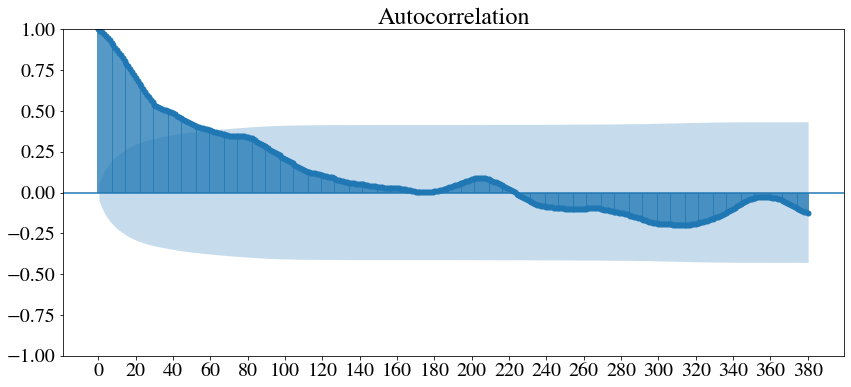

C:\Users\nico0\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



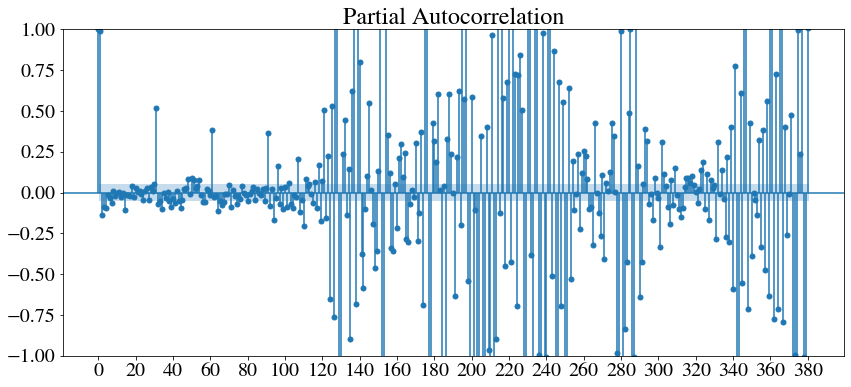

C:\Users\nico0\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



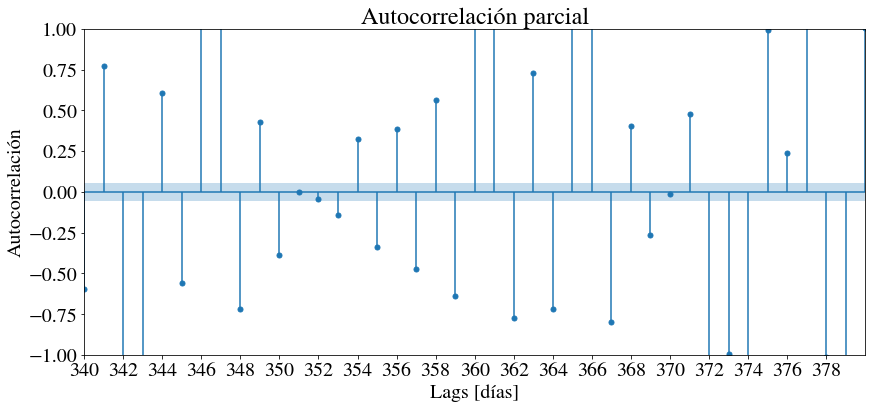

In [51]:
fig, ax = plt.subplots(figsize=(14,6))
plot_acf(df_rolling[name_supermarker][30:],lags=380, ax = ax)
plt.xticks(np.arange(0,400,20))
plt.show()


fig, ax = plt.subplots(figsize=(14,6))
plot_pacf(df_rolling[name_supermarker][30:],lags=380, ax = ax)
plt.xticks(np.arange(0,400,20))
plt.show()

fig, ax = plt.subplots(figsize=(14,6))
plot_pacf(df_rolling[name_supermarker][30:],lags=380, ax = ax)
plt.xticks(np.arange(340,380,2))
plt.title("Autocorrelación parcial")
plt.ylabel("Autocorrelación")
plt.xlabel("Lags [días]")
plt.xlim(340,380)
plt.show()

Se escogen los lags con distancias cercanas a un año puesto que uno de los problemas con usar la información de los lags es que no se puede realizar predicciones por encima del lag más pequeño, es decir, en este caso 358 días.

Se escogen lags con significacia estadística

In [52]:
target_map = df_rolling[name_supermarker].to_dict()

In [53]:
df_rolling['lag_1'] = (df_rolling.index - pd.Timedelta('358 days')).map(target_map )
df_rolling['lag_2'] = (df_rolling.index - pd.Timedelta('359 days')).map(target_map )
df_rolling['lag_3'] = (df_rolling.index - pd.Timedelta('360 days')).map(target_map )
df_rolling['lag_4'] = (df_rolling.index - pd.Timedelta('361 days')).map(target_map )
df_rolling['lag_5'] = (df_rolling.index - pd.Timedelta('362 days')).map(target_map )
df_rolling['lag_6'] = (df_rolling.index - pd.Timedelta('363 days')).map(target_map )
df_rolling['lag_7'] = (df_rolling.index - pd.Timedelta('364 days')).map(target_map )
df_rolling['lag_8'] = (df_rolling.index - pd.Timedelta('365 days')).map(target_map )
df_rolling['lag_9'] = (df_rolling.index - pd.Timedelta('366 days')).map(target_map )
df_rolling['lag_10'] = (df_rolling.index - pd.Timedelta('367 days')).map(target_map )

In [54]:
df_rolling

,A0052,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
Date Created,,,,,,,,,,,
2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2015-10-28,2.633333,1.400000,1.566667,1.633333,1.566667,1.566667,1.600000,1.633333,1.633333,1.633333,1.533333
2015-10-29,2.700000,1.400000,1.400000,1.566667,1.633333,1.566667,1.566667,1.600000,1.633333,1.633333,1.633333
2015-10-30,2.800000,1.400000,1.400000,1.400000,1.566667,1.633333,1.566667,1.566667,1.600000,1.633333,1.633333


## 3.4 Separación de datos en entrenamiento y test

In [113]:
df_rolling['Date Created year']=df_rolling.index.year  #recupera el año  
df_rolling['Date Created month']=df_rolling.index.month  #recupera el mes
df_rolling['Date Created day']=df_rolling.index.day #recupera el número del día
df_rolling['Date Created hour']=df_rolling.index.hour #recupera la hora
df_rolling['Date Created week day']=df_rolling.index.dayofweek #recupera el día nombre del dia de semana
df_rolling['season'] = df_rolling['Date Created month']%12 // 3 + 1

In [114]:
train = df_rolling.loc[df_1d.index <= '2015-06']
train = train[~pd.isnull(train['lag_10'])]

test =  df_rolling.loc[df_1d.index >= '2015-06']

In [115]:
test.shape[0]/train.shape[0] *100

18.757612667478686

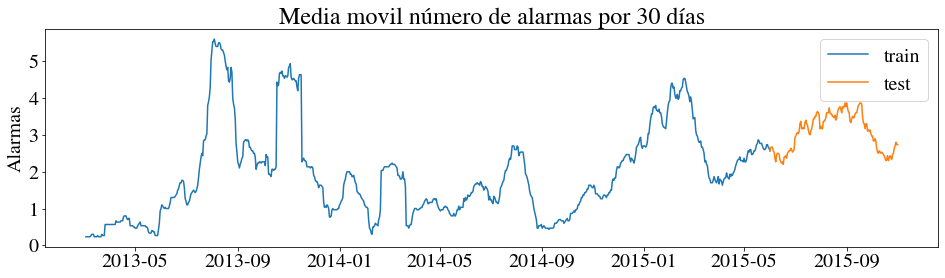

In [119]:
plt.figure(figsize=(16,4))
plt.plot(train[name_supermarker], label = 'train')
plt.plot(test[name_supermarker], label = 'test')
plt.title("Media movil número de alarmas por 30 días")
plt.ylabel("Alarmas")
plt.yticks(np.arange(0,6,1));
plt.legend()

In [59]:
X_train = train.drop(name_supermarker, axis =1 ).values
y_train = train[name_supermarker].values

X_test = test.drop(name_supermarker, axis =1 ).values
y_test = test[name_supermarker].values


## 3.5 Entrenando el modelo  XGBoost Regressor

In [120]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## 3.5.1 Primer modelo

In [121]:
reg = xgb.XGBRegressor(n_stimators=100,early_stopping_rounds=50, learning_rate = 0.01)

reg.fit(X_train, y_train,
        verbose = False,
        eval_set = [(X_train, y_train), (X_test, y_test)])

[23:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_stimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             n_stimators=100, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [122]:
reg.feature_importances_
fi = pd.DataFrame(data = reg.feature_importances_, index=train.drop(name_supermarker, axis =1 ).columns,
            columns=['importance'])

<AxesSubplot:title={'center':'feature importance'}>

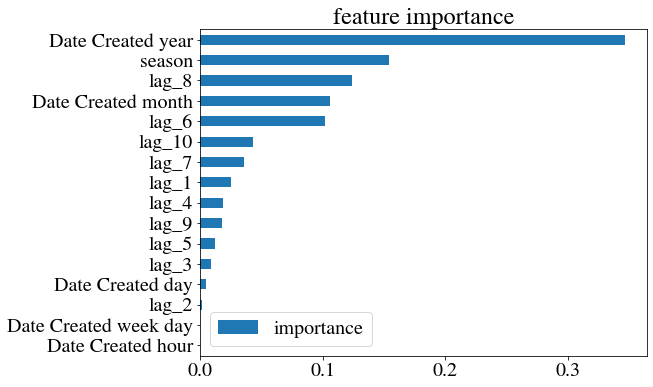

In [123]:
fi.sort_values(by= 'importance' ).plot(kind = 'barh', title = 'feature importance')

### Se observa que la información tanto del año como de la estación son muy importantes para realizar la predicción de las alarmas, esto puede ser debido a que la temperatura posiblemente afecte el funcionamiento de los refrigeradores

In [124]:
prediction_df_train = pd.DataFrame(data =reg.predict(X_train), index=train.index, columns=['prediction'] )
prediction_df_test = pd.DataFrame(data =reg.predict(X_test), index=test.index, columns=['prediction'] )

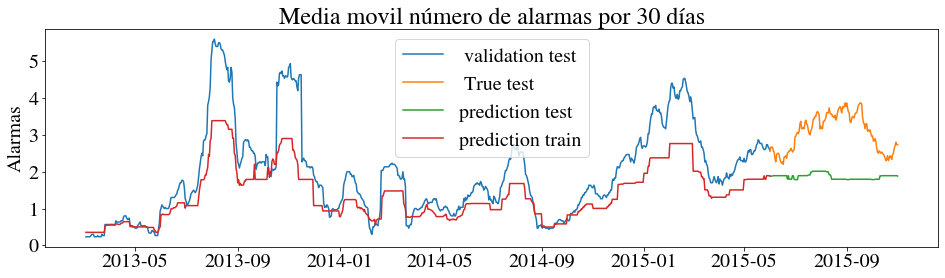

In [126]:
plt.figure(figsize=(16,4))
plt.plot(train[name_supermarker], label =' validation test')
plt.plot(test[name_supermarker], label =' True test')
plt.plot(prediction_df_test, label ='prediction test')
plt.plot(prediction_df_train, label ='prediction train')
plt.title("Media movil número de alarmas por 30 días")
plt.ylabel("Alarmas")
plt.yticks(np.arange(0,6,1));
plt.legend()

In [58]:
rmse = np.sqrt(mean_squared_error(train[name_supermarker], prediction_df_train['prediction']))
r2   = r2_score( train[name_supermarker] , prediction_df_train['prediction'] )

print(r2,rmse)

0.6049284109819284 0.7748239365474932


In [59]:
rmse = np.sqrt(mean_squared_error(test[name_supermarker], prediction_df_test['prediction']))
r2   = r2_score( test[name_supermarker] , prediction_df_test['prediction'] )

print(r2,rmse)

-5.902312232878469 1.3051310870934214


las métricas test son bastante malas, de tal manera que se usará la librería Optuna para la optimización de los hiperparámetros

## 4. Ajustando hiperparámetros

In [357]:
import optuna

In [370]:
def objetive_XGB(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 10, 400)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.6)
    max_depth = trial.suggest_int('max_depth', 4, 20)
    min_child_weight = trial.suggest_float('min_child_weight', 0.5, 10)
    gamma = trial.suggest_float('gamma', 0.05, 0.4, log=True)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1)
    
        
    # define and fit the model
    global XGBR
    XGBR = xgb.XGBRegressor(n_estimators=n_estimators,
                                learning_rate=learning_rate,
                                max_depth=max_depth,
                                min_child_weight=min_child_weight,
                                gamma=gamma,colsample_bytree=colsample_bytree)
        
    #Training the model    
    XGBR.fit(X_train, y_train) 
      
    #Evaluation of the model 
    predictions_test = XGBR.predict(X_test)
    predictions_train = XGBR.predict(X_train)
    
    MSE_train = mean_squared_error(y_train,predictions_train)
    MSE_test = mean_squared_error(y_test,predictions_test)
    
    r2_train = r2_score(y_train,predictions_train)
    r2_test = r2_score(y_test,predictions_test)
    
    print("RMSE on train",np.sqrt(MSE_train))
    print("RMSE on test",np.sqrt(MSE_test))
    print("R2 on train",r2_train)
    print("R2 on test",r2_test)
    print("\n")

    
    
    return MSE_test


#Para guardar el modelo
def callback(study, trial):
    global best_model
    if study.best_trial == trial:
        best_model = XGBR

In [374]:
study_name = "XGB-Regressor-fridge-alarms-anio-2"
storage = 'sqlite:///db_%s.db'%(study_name)

n_startup_trials = 15
n_trials         = 300

storage

'sqlite:///db_XGB-Regressor-fridge-alarms-anio-2.db'

In [375]:
%%time
sampler = optuna.samplers.TPESampler(n_startup_trials=n_startup_trials)

study= optuna.create_study(study_name="XGBoost", direction="minimize",
                          sampler= sampler, storage=storage) #

study.optimize(objetive_XGB, n_trials=n_trials, callbacks=[callback])

[I 2022-11-27 00:05:41,903] A new study created in RDB with name: XGBoost
[I 2022-11-27 00:05:42,437] Trial 0 finished with value: 0.5658052846803024 and parameters: {'n_estimators': 84, 'learning_rate': 0.43713558899341043, 'max_depth': 9, 'min_child_weight': 1.0861612093604198, 'gamma': 0.19937637533656805, 'colsample_bytree': 0.7009740582099576}. Best is trial 0 with value: 0.5658052846803024.


RMSE on train 0.10444899132661918
RMSE on test 0.7522002955864232
R2 on train 0.9928207637996151
R2 on test -1.2927322084168495




[I 2022-11-27 00:05:42,744] Trial 1 finished with value: 0.3485443246858465 and parameters: {'n_estimators': 25, 'learning_rate': 0.28370279653740765, 'max_depth': 13, 'min_child_weight': 6.1294330332008435, 'gamma': 0.07713229985887592, 'colsample_bytree': 0.6736460732335703}. Best is trial 1 with value: 0.3485443246858465.


RMSE on train 0.08561063280491514
RMSE on test 0.5903764262619625
R2 on train 0.9951769123338964
R2 on test -0.4123565489842802




[I 2022-11-27 00:05:43,596] Trial 2 finished with value: 0.36950339430438733 and parameters: {'n_estimators': 351, 'learning_rate': 0.33111149575399484, 'max_depth': 9, 'min_child_weight': 9.347188824742256, 'gamma': 0.2513560419779413, 'colsample_bytree': 0.5010976018889762}. Best is trial 1 with value: 0.3485443246858465.


RMSE on train 0.11913379382166946
RMSE on test 0.6078679085988891
R2 on train 0.9906601546391878
R2 on test -0.49728600311624627




[I 2022-11-27 00:05:44,171] Trial 3 finished with value: 0.3121980007208149 and parameters: {'n_estimators': 218, 'learning_rate': 0.2807942720184168, 'max_depth': 5, 'min_child_weight': 1.7845931494695775, 'gamma': 0.05449590130518296, 'colsample_bytree': 0.8580915150624369}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.08826139161979273
RMSE on test 0.5587468127164708
R2 on train 0.9948736142501284
R2 on test -0.26507551455692147




[I 2022-11-27 00:05:44,859] Trial 4 finished with value: 0.5670400243155556 and parameters: {'n_estimators': 200, 'learning_rate': 0.3818700501882286, 'max_depth': 17, 'min_child_weight': 4.958526959222234, 'gamma': 0.15987515651817957, 'colsample_bytree': 0.5274727517140934}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.09485113967310256
RMSE on test 0.7530206001933517
R2 on train 0.9940795482187327
R2 on test -1.2977355680661908




[I 2022-11-27 00:05:45,290] Trial 5 finished with value: 0.5576472797907448 and parameters: {'n_estimators': 60, 'learning_rate': 0.35533785226266046, 'max_depth': 15, 'min_child_weight': 5.6961677684629795, 'gamma': 0.27857021977488444, 'colsample_bytree': 0.735867942434979}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.11410627321938895
RMSE on test 0.7467578454832228
R2 on train 0.9914318160062199
R2 on test -1.2596746865570467




[I 2022-11-27 00:05:46,439] Trial 6 finished with value: 0.3759379082701113 and parameters: {'n_estimators': 320, 'learning_rate': 0.29822212830101774, 'max_depth': 16, 'min_child_weight': 1.4306376462609824, 'gamma': 0.22980879064240192, 'colsample_bytree': 0.6597985341047649}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.09628684842376958
RMSE on test 0.6131377563566863
R2 on train 0.9938989626259083
R2 on test -0.5233596680574619




[I 2022-11-27 00:05:47,612] Trial 7 finished with value: 0.4970392384159882 and parameters: {'n_estimators': 376, 'learning_rate': 0.2481591403369969, 'max_depth': 12, 'min_child_weight': 1.8095819135141895, 'gamma': 0.21972871487173298, 'colsample_bytree': 0.5474669403740464}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.09794304457853878
RMSE on test 0.7050100980950472
R2 on train 0.993687273970521
R2 on test -1.0140813485105822




[I 2022-11-27 00:05:48,373] Trial 8 finished with value: 0.6430610378202035 and parameters: {'n_estimators': 167, 'learning_rate': 0.5314783580845224, 'max_depth': 17, 'min_child_weight': 3.6924437832178767, 'gamma': 0.0933516386086769, 'colsample_bytree': 0.8964620254189272}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.07987306031856105
RMSE on test 0.8019108665058752
R2 on train 0.9958017297568406
R2 on test -1.6057846989206004




[I 2022-11-27 00:05:49,212] Trial 9 finished with value: 0.6019063626479247 and parameters: {'n_estimators': 281, 'learning_rate': 0.520943212028463, 'max_depth': 14, 'min_child_weight': 5.0207455032369515, 'gamma': 0.08506048858989028, 'colsample_bytree': 0.923959768160816}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.07439059691629545
RMSE on test 0.7758262451399313
R2 on train 0.9963582860604402
R2 on test -1.4390194674015429




[I 2022-11-27 00:05:50,109] Trial 10 finished with value: 0.5020707814500109 and parameters: {'n_estimators': 398, 'learning_rate': 0.5658112808229304, 'max_depth': 8, 'min_child_weight': 5.565302730082607, 'gamma': 0.11884908807610596, 'colsample_bytree': 0.9847262501030714}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.09579320012873423
RMSE on test 0.7085695318386269
R2 on train 0.993961360477905
R2 on test -1.0344699540688667




[I 2022-11-27 00:05:50,544] Trial 11 finished with value: 0.499787751380005 and parameters: {'n_estimators': 49, 'learning_rate': 0.28840915589397564, 'max_depth': 14, 'min_child_weight': 2.5015114130457254, 'gamma': 0.22561554808639764, 'colsample_bytree': 0.7727566704498483}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.10738209835710953
RMSE on test 0.7069566828172749
R2 on train 0.9924118918165696
R2 on test -1.0252187563229063




[I 2022-11-27 00:05:51,061] Trial 12 finished with value: 0.6253292778101421 and parameters: {'n_estimators': 283, 'learning_rate': 0.5057106240011258, 'max_depth': 4, 'min_child_weight': 1.9990265705797292, 'gamma': 0.10743864314192193, 'colsample_bytree': 0.6445080150549325}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.11078813043938046
RMSE on test 0.7907776411926062
R2 on train 0.9919228860698754
R2 on test -1.533932812082964




[I 2022-11-27 00:05:51,960] Trial 13 finished with value: 0.3455801483597492 and parameters: {'n_estimators': 398, 'learning_rate': 0.13186173414859073, 'max_depth': 13, 'min_child_weight': 6.65756032536073, 'gamma': 0.2851383411191617, 'colsample_bytree': 0.7404662387444422}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.11386150730847942
RMSE on test 0.5878606538625878
R2 on train 0.9914685352852141
R2 on test -0.4003452392311204




[I 2022-11-27 00:05:52,701] Trial 14 finished with value: 0.31395816251791714 and parameters: {'n_estimators': 301, 'learning_rate': 0.16295416873852847, 'max_depth': 11, 'min_child_weight': 5.262181559969297, 'gamma': 0.07243449666483061, 'colsample_bytree': 0.6416390075087617}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.07225195907573324
RMSE on test 0.5603196967070827
R2 on train 0.9965646657762623
R2 on test -0.27220796763487654




[I 2022-11-27 00:05:53,338] Trial 15 finished with value: 0.38632970744833967 and parameters: {'n_estimators': 242, 'learning_rate': 0.047991202803303906, 'max_depth': 20, 'min_child_weight': 7.480064284472466, 'gamma': 0.050970254881030026, 'colsample_bytree': 0.8323465850097387}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.06590188216437039
RMSE on test 0.6215542675007064
R2 on train 0.9971419792473187
R2 on test -0.5654688765156086




[I 2022-11-27 00:05:53,752] Trial 16 finished with value: 0.4075347527974251 and parameters: {'n_estimators': 140, 'learning_rate': 0.17310252098520867, 'max_depth': 4, 'min_child_weight': 3.4557980403122537, 'gamma': 0.05538902680910604, 'colsample_bytree': 0.8296468316425789}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.09816490652429576
RMSE on test 0.6383844866515986
R2 on train 0.9936586422292311
R2 on test -0.6513950630839411




[I 2022-11-27 00:05:54,331] Trial 17 finished with value: 0.39913862745555817 and parameters: {'n_estimators': 241, 'learning_rate': 0.18908346878038906, 'max_depth': 7, 'min_child_weight': 3.988415749623396, 'gamma': 0.06451871114677221, 'colsample_bytree': 0.6048093665900288}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.07619136700740238
RMSE on test 0.6317741902417019
R2 on train 0.9961798424641307
R2 on test -0.6173726396135062




[I 2022-11-27 00:05:54,763] Trial 18 finished with value: 0.41622228349045987 and parameters: {'n_estimators': 119, 'learning_rate': 0.08502367658654222, 'max_depth': 6, 'min_child_weight': 0.5248420742603568, 'gamma': 0.3800358684757612, 'colsample_bytree': 0.8184061372761272}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.14283130478420697
RMSE on test 0.6451529148120311
R2 on train 0.9865749303183103
R2 on test -0.6865983069751413




[I 2022-11-27 00:05:55,307] Trial 19 finished with value: 0.3514056652369586 and parameters: {'n_estimators': 209, 'learning_rate': 0.21377110691402762, 'max_depth': 10, 'min_child_weight': 8.85813146969356, 'gamma': 0.06658720835060297, 'colsample_bytree': 0.5881791693238801}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.07488560496211455
RMSE on test 0.5927947918436519
R2 on train 0.9963096596091945
R2 on test -0.42395115196592403




[I 2022-11-27 00:05:56,189] Trial 20 finished with value: 0.4515126346660547 and parameters: {'n_estimators': 313, 'learning_rate': 0.010852001131892192, 'max_depth': 11, 'min_child_weight': 2.9226848541288106, 'gamma': 0.14047513227946856, 'colsample_bytree': 0.9082209203275717}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.1285304716358463
RMSE on test 0.6719468986951682
R2 on train 0.9891286884039847
R2 on test -0.8296003731936377




[I 2022-11-27 00:05:56,866] Trial 21 finished with value: 0.37623878714140596 and parameters: {'n_estimators': 342, 'learning_rate': 0.14157988581600622, 'max_depth': 6, 'min_child_weight': 7.526643405190102, 'gamma': 0.3113095718858502, 'colsample_bytree': 0.7625700782969265}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.13937496714668143
RMSE on test 0.613383067211189
R2 on train 0.9872168084259682
R2 on test -0.5245788766752095




[I 2022-11-27 00:05:57,648] Trial 22 finished with value: 0.3784998807565791 and parameters: {'n_estimators': 278, 'learning_rate': 0.1161424227944775, 'max_depth': 20, 'min_child_weight': 6.818963217213753, 'gamma': 0.06606195112597127, 'colsample_bytree': 0.7258220092198423}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.0678323567353566
RMSE on test 0.6152234397002272
R2 on train 0.9969720858749485
R2 on test -0.5337411844480722




[I 2022-11-27 00:05:58,338] Trial 23 finished with value: 0.46706400068284737 and parameters: {'n_estimators': 235, 'learning_rate': 0.22623954563758547, 'max_depth': 11, 'min_child_weight': 4.450284922640391, 'gamma': 0.16951410109157505, 'colsample_bytree': 0.7885050558046072}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.0916192983216801
RMSE on test 0.6834208079088955
R2 on train 0.9944761272666521
R2 on test -0.8926169598480485




[I 2022-11-27 00:05:59,228] Trial 24 finished with value: 0.39852253251529063 and parameters: {'n_estimators': 381, 'learning_rate': 0.12611032522029686, 'max_depth': 12, 'min_child_weight': 6.540661911415453, 'gamma': 0.39262071477667476, 'colsample_bytree': 0.8659188802974347}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.1318170529564358
RMSE on test 0.6312864108432009
R2 on train 0.9885656116779827
R2 on test -0.6148761257928688




[I 2022-11-27 00:06:00,070] Trial 25 finished with value: 0.398673970404938 and parameters: {'n_estimators': 311, 'learning_rate': 0.16227165412215147, 'max_depth': 18, 'min_child_weight': 8.230708822840239, 'gamma': 0.059264136282983396, 'colsample_bytree': 0.6089510897744844}. Best is trial 3 with value: 0.3121980007208149.


RMSE on train 0.06598753885932086
RMSE on test 0.6314063433359994
R2 on train 0.9971345449313305
R2 on test -0.6154897759947493




[I 2022-11-27 00:06:00,504] Trial 26 finished with value: 0.2860002769865678 and parameters: {'n_estimators': 181, 'learning_rate': 0.08979195594172455, 'max_depth': 6, 'min_child_weight': 7.443001474394214, 'gamma': 0.0781325359971218, 'colsample_bytree': 0.7037502158791753}. Best is trial 26 with value: 0.2860002769865678.


RMSE on train 0.09412245791028392
RMSE on test 0.5347899372525327
R2 on train 0.9941701650293996
R2 on test -0.15891820811420598




[I 2022-11-27 00:06:00,936] Trial 27 finished with value: 0.22770367833236038 and parameters: {'n_estimators': 175, 'learning_rate': 0.06285948047332156, 'max_depth': 5, 'min_child_weight': 8.128772268099993, 'gamma': 0.07967966203250938, 'colsample_bytree': 0.6925641587366964}. Best is trial 27 with value: 0.22770367833236038.


RMSE on train 0.12177516524778871
RMSE on test 0.4771830658482763
R2 on train 0.9902414071963439
R2 on test 0.07730879964725912




[I 2022-11-27 00:06:01,382] Trial 28 finished with value: 0.24245063881460274 and parameters: {'n_estimators': 178, 'learning_rate': 0.07538818090259389, 'max_depth': 5, 'min_child_weight': 9.752556895549182, 'gamma': 0.10232201908418018, 'colsample_bytree': 0.6973546957062594}. Best is trial 27 with value: 0.22770367833236038.


RMSE on train 0.12813594761126695
RMSE on test 0.49239276884881517
R2 on train 0.989195324914692
R2 on test 0.01755179102725013




[I 2022-11-27 00:06:01,774] Trial 29 finished with value: 0.2744854004924637 and parameters: {'n_estimators': 106, 'learning_rate': 0.0708170969730337, 'max_depth': 8, 'min_child_weight': 9.444569615103513, 'gamma': 0.10385189328292647, 'colsample_bytree': 0.6968382827835289}. Best is trial 27 with value: 0.22770367833236038.


RMSE on train 0.10187729206620874
RMSE on test 0.5239135429557664
R2 on train 0.9931699398727867
R2 on test -0.11225811332754865




[I 2022-11-27 00:06:02,186] Trial 30 finished with value: 0.676815370643143 and parameters: {'n_estimators': 106, 'learning_rate': 0.01719204576291554, 'max_depth': 8, 'min_child_weight': 9.896569525054048, 'gamma': 0.10224674108436187, 'colsample_bytree': 0.6883692742802178}. Best is trial 27 with value: 0.22770367833236038.


RMSE on train 0.4048760178461817
RMSE on test 0.8226878938231332
R2 on train 0.8921267291971702
R2 on test -1.7425625766325465




[I 2022-11-27 00:06:02,604] Trial 31 finished with value: 0.24684235540100102 and parameters: {'n_estimators': 170, 'learning_rate': 0.08253672006974799, 'max_depth': 6, 'min_child_weight': 8.527799913232133, 'gamma': 0.1343212497850677, 'colsample_bytree': 0.706531105203026}. Best is trial 27 with value: 0.22770367833236038.


RMSE on train 0.11622385422792693
RMSE on test 0.4968323212120977
R2 on train 0.9911108489029894
R2 on test -0.0002441369014951622




[I 2022-11-27 00:06:03,043] Trial 32 finished with value: 0.2416790505260426 and parameters: {'n_estimators': 168, 'learning_rate': 0.060143634827918374, 'max_depth': 5, 'min_child_weight': 8.643123162562102, 'gamma': 0.12792630253438722, 'colsample_bytree': 0.7045225305793923}. Best is trial 27 with value: 0.22770367833236038.


RMSE on train 0.12976349985738797
RMSE on test 0.4916086355283465
R2 on train 0.9889191049331553
R2 on test 0.020678388407510684




[I 2022-11-27 00:06:03,474] Trial 33 finished with value: 0.20580777247418802 and parameters: {'n_estimators': 151, 'learning_rate': 0.04388154709553289, 'max_depth': 5, 'min_child_weight': 8.482365199544107, 'gamma': 0.1271419837388872, 'colsample_bytree': 0.7110239887432018}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.1552824031404193
RMSE on test 0.4536604153705589
R2 on train 0.9841322909547664
R2 on test 0.1660344619073073




[I 2022-11-27 00:06:03,878] Trial 34 finished with value: 0.23420774997161262 and parameters: {'n_estimators': 145, 'learning_rate': 0.03982905846209582, 'max_depth': 4, 'min_child_weight': 9.931464614912606, 'gamma': 0.11861707748706524, 'colsample_bytree': 0.7947026440003453}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.2724998257906221
RMSE on test 0.48395015236242317
R2 on train 0.9511345165995002
R2 on test 0.05095327604766964




[I 2022-11-27 00:06:04,243] Trial 35 finished with value: 0.24678375663288493 and parameters: {'n_estimators': 139, 'learning_rate': 0.0363280188034113, 'max_depth': 4, 'min_child_weight': 8.909357180574029, 'gamma': 0.18378786127655306, 'colsample_bytree': 0.7973559505627675}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.2915786715540995
RMSE on test 0.4967733453325419
R2 on train 0.9440524275489193
R2 on test -6.685455439470189e-06




[I 2022-11-27 00:06:04,658] Trial 36 finished with value: 0.2751314346079077 and parameters: {'n_estimators': 146, 'learning_rate': 0.046708474410183234, 'max_depth': 5, 'min_child_weight': 8.06844800024607, 'gamma': 0.12374252507162954, 'colsample_bytree': 0.7576010724085523}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.14848574678777088
RMSE on test 0.5245297270964799
R2 on train 0.9854909400052669
R2 on test -0.11487594540568358




[I 2022-11-27 00:06:05,180] Trial 37 finished with value: 0.24609028458250923 and parameters: {'n_estimators': 194, 'learning_rate': 0.11044465868707201, 'max_depth': 7, 'min_child_weight': 9.242999499178849, 'gamma': 0.15076212876710013, 'colsample_bytree': 0.6721296048465665}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.11026547932305825
RMSE on test 0.4960748779997927
R2 on train 0.9919989150622979
R2 on test 0.002803372613268018




[I 2022-11-27 00:06:05,518] Trial 38 finished with value: 0.2834323460103279 and parameters: {'n_estimators': 86, 'learning_rate': 0.048633231993691906, 'max_depth': 5, 'min_child_weight': 7.877041776080664, 'gamma': 0.11900166764171516, 'colsample_bytree': 0.7252992387429158}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.21517334599709903
RMSE on test 0.5323836455135788
R2 on train 0.9695318076960623
R2 on test -0.1485125469837283




[I 2022-11-27 00:06:05,908] Trial 39 finished with value: 0.4203364939675892 and parameters: {'n_estimators': 73, 'learning_rate': 0.418538896108818, 'max_depth': 9, 'min_child_weight': 8.614694620469157, 'gamma': 0.08765352526345929, 'colsample_bytree': 0.6259139208827349}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.0842696880070297
RMSE on test 0.6483336285953315
R2 on train 0.9953268199554635
R2 on test -0.7032697364024052




[I 2022-11-27 00:06:06,165] Trial 40 finished with value: 0.3661756656569468 and parameters: {'n_estimators': 29, 'learning_rate': 0.2594312410833962, 'max_depth': 7, 'min_child_weight': 9.196528892187986, 'gamma': 0.19745009058836868, 'colsample_bytree': 0.5759734458581796}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.1333799357035893
RMSE on test 0.6051245042608561
R2 on train 0.9882928616984237
R2 on test -0.4838015220457499




[I 2022-11-27 00:06:06,559] Trial 41 finished with value: 0.21635679118505496 and parameters: {'n_estimators': 165, 'learning_rate': 0.06412358987112068, 'max_depth': 5, 'min_child_weight': 9.953792811478909, 'gamma': 0.0930745917346212, 'colsample_bytree': 0.6729606146091085}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.12334019330931288
RMSE on test 0.4651416893647085
R2 on train 0.9899889647414857
R2 on test 0.12328817511844758




[I 2022-11-27 00:06:06,970] Trial 42 finished with value: 0.26826224664708354 and parameters: {'n_estimators': 162, 'learning_rate': 0.015890872443702866, 'max_depth': 4, 'min_child_weight': 9.543385467639169, 'gamma': 0.09175495324284953, 'colsample_bytree': 0.6690018476886821}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.4531365748868831
RMSE on test 0.5179403890865082
R2 on train 0.864877405140103
R2 on test -0.08704091291327853




[I 2022-11-27 00:06:07,408] Trial 43 finished with value: 0.2698180645506703 and parameters: {'n_estimators': 156, 'learning_rate': 0.06304768077283246, 'max_depth': 5, 'min_child_weight': 9.786722672071736, 'gamma': 0.13065454892538383, 'colsample_bytree': 0.7230737349319103}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.13877701618200264
RMSE on test 0.5194401453013333
R2 on train 0.9873262588562592
R2 on test -0.09334533232145081




[I 2022-11-27 00:06:07,763] Trial 44 finished with value: 0.25044933751641385 and parameters: {'n_estimators': 115, 'learning_rate': 0.10048086243157242, 'max_depth': 5, 'min_child_weight': 9.989388493064947, 'gamma': 0.11129144800834918, 'colsample_bytree': 0.6429628761347146}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.13153350148268622
RMSE on test 0.5004491357934528
R2 on train 0.9886147517611678
R2 on test -0.014860197046397072




[I 2022-11-27 00:06:08,255] Trial 45 finished with value: 0.23024963529000153 and parameters: {'n_estimators': 223, 'learning_rate': 0.035045173144156005, 'max_depth': 4, 'min_child_weight': 8.418565542681764, 'gamma': 0.1578131041688752, 'colsample_bytree': 0.7855168800601849}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.21287635146079745
RMSE on test 0.4798433445302764
R2 on train 0.9701788369221436
R2 on test 0.06699218070418045




[I 2022-11-27 00:06:08,695] Trial 46 finished with value: 0.508154826181233 and parameters: {'n_estimators': 226, 'learning_rate': 0.3289429681887197, 'max_depth': 4, 'min_child_weight': 7.083805176511607, 'gamma': 0.15478932133723872, 'colsample_bytree': 0.801906648886538}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.13614423109431756
RMSE on test 0.7128497921590726
R2 on train 0.9878025729766564
R2 on test -1.0591234624230759




[I 2022-11-27 00:06:09,205] Trial 47 finished with value: 0.3625448045166963 and parameters: {'n_estimators': 195, 'learning_rate': 0.03119138525780127, 'max_depth': 7, 'min_child_weight': 6.059409387437656, 'gamma': 0.07943930100355898, 'colsample_bytree': 0.8668897248404608}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.0932422041316069
RMSE on test 0.6021169359158537
R2 on train 0.9942786989080435
R2 on test -0.46908870032785943




[I 2022-11-27 00:06:09,574] Trial 48 finished with value: 0.2835164938464072 and parameters: {'n_estimators': 128, 'learning_rate': 0.10597366490385238, 'max_depth': 6, 'min_child_weight': 9.105929261620478, 'gamma': 0.09672891559004945, 'colsample_bytree': 0.7789661343483424}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.10342909347844631
RMSE on test 0.5324626689697666
R2 on train 0.9929602833679514
R2 on test -0.14885352728078693




[I 2022-11-27 00:06:10,109] Trial 49 finished with value: 0.6658246506146038 and parameters: {'n_estimators': 268, 'learning_rate': 0.4641242311535385, 'max_depth': 4, 'min_child_weight': 8.22107882308761, 'gamma': 0.17032613295112387, 'colsample_bytree': 0.7523123593333655}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.14003615216250206
RMSE on test 0.8159807905916682
R2 on train 0.9870952356231564
R2 on test -1.6980264464736314




[I 2022-11-27 00:06:10,748] Trial 50 finished with value: 0.338595890397264 and parameters: {'n_estimators': 258, 'learning_rate': 0.13901542346272133, 'max_depth': 9, 'min_child_weight': 8.41873209718715, 'gamma': 0.11161237549496203, 'colsample_bytree': 0.845991020293798}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.08808605141648727
RMSE on test 0.5818899297953729
R2 on train 0.9948939621885271
R2 on test -0.3720439249520755




[I 2022-11-27 00:06:11,275] Trial 51 finished with value: 0.2471226172395128 and parameters: {'n_estimators': 212, 'learning_rate': 0.052808900862498495, 'max_depth': 5, 'min_child_weight': 7.824083740270199, 'gamma': 0.14477098688101595, 'colsample_bytree': 0.7402507847991628}. Best is trial 33 with value: 0.20580777247418802.


RMSE on train 0.125026021120596
RMSE on test 0.49711428991682866
R2 on train 0.9897134305660792
R2 on test -0.0013798020522883814




[I 2022-11-27 00:06:11,701] Trial 52 finished with value: 0.1771604156138631 and parameters: {'n_estimators': 183, 'learning_rate': 0.033279738185554596, 'max_depth': 4, 'min_child_weight': 8.839233565769076, 'gamma': 0.12809060450367377, 'colsample_bytree': 0.6565482405786649}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.25289248334596603
RMSE on test 0.42090428319733586
R2 on train 0.9579136188811588
R2 on test 0.28211806794288896




[I 2022-11-27 00:06:12,148] Trial 53 finished with value: 0.1801275008898198 and parameters: {'n_estimators': 185, 'learning_rate': 0.030079875256500757, 'max_depth': 4, 'min_child_weight': 8.897440616634348, 'gamma': 0.08438921670385327, 'colsample_bytree': 0.6619471132886273}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.27211526633136257
RMSE on test 0.42441430335206637
R2 on train 0.9512723399844558
R2 on test 0.27009497066632493




[I 2022-11-27 00:06:12,549] Trial 54 finished with value: 0.3852616394901956 and parameters: {'n_estimators': 191, 'learning_rate': 0.01229537021232062, 'max_depth': 4, 'min_child_weight': 7.122457688698603, 'gamma': 0.07127907358880052, 'colsample_bytree': 0.6555171892707433}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.47933972055695123
RMSE on test 0.6206944816012107
R2 on train 0.8487983333953156
R2 on test -0.5611408967764329




[I 2022-11-27 00:06:12,981] Trial 55 finished with value: 0.21704527620532524 and parameters: {'n_estimators': 220, 'learning_rate': 0.07695071828777858, 'max_depth': 6, 'min_child_weight': 8.863091492465095, 'gamma': 0.08635035644587878, 'colsample_bytree': 0.6304552608407614}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.09666934049898729
RMSE on test 0.46588118249756044
R2 on train 0.9938503945503226
R2 on test 0.12049832528189464




[I 2022-11-27 00:06:13,459] Trial 56 finished with value: 0.2267381240478348 and parameters: {'n_estimators': 205, 'learning_rate': 0.08792873337440689, 'max_depth': 6, 'min_child_weight': 8.954367048634268, 'gamma': 0.08472841013739077, 'colsample_bytree': 0.6295264040078665}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.09679432712088606
RMSE on test 0.4761702679166716
R2 on train 0.9938344822602041
R2 on test 0.08122137782043326




[I 2022-11-27 00:06:13,931] Trial 57 finished with value: 0.31664974530966017 and parameters: {'n_estimators': 254, 'learning_rate': 0.1842950630859404, 'max_depth': 6, 'min_child_weight': 9.013776424182248, 'gamma': 0.08564836382819715, 'colsample_bytree': 0.5670115471506094}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.09350871226661531
RMSE on test 0.5627163986500306
R2 on train 0.994245946521326
R2 on test -0.2831146854145392




[I 2022-11-27 00:06:14,411] Trial 58 finished with value: 0.37740771424032216 and parameters: {'n_estimators': 200, 'learning_rate': 0.13895926643248996, 'max_depth': 7, 'min_child_weight': 9.445520215814687, 'gamma': 0.07203397192113785, 'colsample_bytree': 0.5114817170262193}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.08365884890779955
RMSE on test 0.6143351806956217
R2 on train 0.9953943226444923
R2 on test -0.529315553552469




[I 2022-11-27 00:06:14,865] Trial 59 finished with value: 0.355019683573448 and parameters: {'n_estimators': 210, 'learning_rate': 0.5997429438973879, 'max_depth': 8, 'min_child_weight': 8.82927665449971, 'gamma': 0.0940481086929592, 'colsample_bytree': 0.622775809004978}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.08774392618164613
RMSE on test 0.5958352822495895
R2 on train 0.9949335487491416
R2 on test -0.4385957239878344




[I 2022-11-27 00:06:15,323] Trial 60 finished with value: 0.3710410013497679 and parameters: {'n_estimators': 184, 'learning_rate': 0.09096593527687598, 'max_depth': 6, 'min_child_weight': 7.661270734533024, 'gamma': 0.0879744294273993, 'colsample_bytree': 0.5548652808620627}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.09832464982616736
RMSE on test 0.6091313498333245
R2 on train 0.9936379869119477
R2 on test -0.5035166292561639




[I 2022-11-27 00:06:15,732] Trial 61 finished with value: 0.22891885543330748 and parameters: {'n_estimators': 159, 'learning_rate': 0.07107272840462625, 'max_depth': 5, 'min_child_weight': 9.339958721004392, 'gamma': 0.08182625055489604, 'colsample_bytree': 0.6824527051018598}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.12624534410701813
RMSE on test 0.4784546534764893
R2 on train 0.9895118115449204
R2 on test 0.07238471047080997




[I 2022-11-27 00:06:16,116] Trial 62 finished with value: 0.26406263035750116 and parameters: {'n_estimators': 225, 'learning_rate': 0.1165846299431724, 'max_depth': 6, 'min_child_weight': 8.029798345721847, 'gamma': 0.07602878007216768, 'colsample_bytree': 0.6278824150302136}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.09434519404896695
RMSE on test 0.5138702466163041
R2 on train 0.9941425403499121
R2 on test -0.07002340567037946




[I 2022-11-27 00:06:16,581] Trial 63 finished with value: 0.3271680515420337 and parameters: {'n_estimators': 177, 'learning_rate': 0.1538677976246042, 'max_depth': 7, 'min_child_weight': 8.808776099329929, 'gamma': 0.06207144450531375, 'colsample_bytree': 0.598759341067358}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.08222553453631876
RMSE on test 0.5719860588703485
R2 on train 0.9955507874626895
R2 on test -0.3257365203989553




[I 2022-11-27 00:06:17,021] Trial 64 finished with value: 0.19696048488416604 and parameters: {'n_estimators': 238, 'learning_rate': 0.07359763234071338, 'max_depth': 5, 'min_child_weight': 9.63690001058295, 'gamma': 0.09566756786425573, 'colsample_bytree': 0.6469557154460317}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.1119600652087855
RMSE on test 0.44380230382926816
R2 on train 0.9917511002248882
R2 on test 0.20188506592955757




[I 2022-11-27 00:06:17,492] Trial 65 finished with value: 0.2382625989231146 and parameters: {'n_estimators': 245, 'learning_rate': 0.0923820915520922, 'max_depth': 4, 'min_child_weight': 9.559520826987546, 'gamma': 0.09789337551535404, 'colsample_bytree': 0.6545227338402315}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.12379028285652682
RMSE on test 0.4881215001647793
R2 on train 0.9899157674561847
R2 on test 0.03452238888014025




[I 2022-11-27 00:06:17,992] Trial 66 finished with value: 0.2303716816338566 and parameters: {'n_estimators': 294, 'learning_rate': 0.023855274109999686, 'max_depth': 6, 'min_child_weight': 9.568772587573214, 'gamma': 0.11226480788149097, 'colsample_bytree': 0.6157294123089451}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.12562512629134298
RMSE on test 0.47997050079547243
R2 on train 0.9896146110992468
R2 on test 0.06649762967920358




[I 2022-11-27 00:06:18,470] Trial 67 finished with value: 0.19021547110566037 and parameters: {'n_estimators': 204, 'learning_rate': 0.07342557726792827, 'max_depth': 5, 'min_child_weight': 9.124866925384213, 'gamma': 0.09110666340377215, 'colsample_bytree': 0.6376602281760705}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.12237609709469051
RMSE on test 0.4361369866288118
R2 on train 0.9901448568277837
R2 on test 0.2292169250600945




[I 2022-11-27 00:06:18,837] Trial 68 finished with value: 0.2533180351131787 and parameters: {'n_estimators': 134, 'learning_rate': 0.208399127532665, 'max_depth': 5, 'min_child_weight': 9.172977070267317, 'gamma': 0.10417360646125151, 'colsample_bytree': 0.6643306971858881}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.10837166696449466
RMSE on test 0.5033070982145779
R2 on train 0.9922713925572787
R2 on test -0.026484611936807623




[I 2022-11-27 00:06:19,403] Trial 69 finished with value: 0.2556536240946923 and parameters: {'n_estimators': 234, 'learning_rate': 0.0615388106551069, 'max_depth': 15, 'min_child_weight': 8.586705727971223, 'gamma': 0.13870942370452907, 'colsample_bytree': 0.6425902538061026}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.0939258325438739
RMSE on test 0.5056220170193266
R2 on train 0.9941944970780414
R2 on test -0.03594878667770862




[I 2022-11-27 00:06:19,940] Trial 70 finished with value: 0.3594402971277241 and parameters: {'n_estimators': 151, 'learning_rate': 0.11922526378773399, 'max_depth': 13, 'min_child_weight': 9.634129819728697, 'gamma': 0.09211960093622767, 'colsample_bytree': 0.58251650183728}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.08632100151451588
RMSE on test 0.5995333995097555
R2 on train 0.9950965394861814
R2 on test -0.45650874698580735




[I 2022-11-27 00:06:20,369] Trial 71 finished with value: 0.279489264799768 and parameters: {'n_estimators': 203, 'learning_rate': 0.08029482308924547, 'max_depth': 6, 'min_child_weight': 9.013747028284895, 'gamma': 0.06982699210049166, 'colsample_bytree': 0.5999776728055176}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.09311846339294727
RMSE on test 0.5286674425380932
R2 on train 0.9942938741876932
R2 on test -0.1325345603218291




[I 2022-11-27 00:06:20,830] Trial 72 finished with value: 0.1807778010141695 and parameters: {'n_estimators': 188, 'learning_rate': 0.032811466541229975, 'max_depth': 5, 'min_child_weight': 8.765795764680384, 'gamma': 0.08302374011982562, 'colsample_bytree': 0.6335796222621912}. Best is trial 52 with value: 0.1771604156138631.


RMSE on train 0.16153821206980795
RMSE on test 0.4251797278965326
R2 on train 0.982828023522469
R2 on test 0.2674598520475999




[I 2022-11-27 00:06:21,250] Trial 73 finished with value: 0.16364252843567145 and parameters: {'n_estimators': 185, 'learning_rate': 0.03163516601172492, 'max_depth': 5, 'min_child_weight': 8.393143206601183, 'gamma': 0.07683447643125851, 'colsample_bytree': 0.6763431001440551}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.16762841844930956
RMSE on test 0.40452753730206237
R2 on train 0.9815088025310018
R2 on test 0.3368946777808426




[I 2022-11-27 00:06:21,661] Trial 74 finished with value: 0.18020990047618574 and parameters: {'n_estimators': 188, 'learning_rate': 0.030718597970462648, 'max_depth': 5, 'min_child_weight': 8.291574599749074, 'gamma': 0.07617760667498834, 'colsample_bytree': 0.6747527573295842}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.16758205667104337
RMSE on test 0.42451136672200634
R2 on train 0.9815190295110476
R2 on test 0.26976107455270315




[I 2022-11-27 00:06:22,132] Trial 75 finished with value: 0.2485836309287987 and parameters: {'n_estimators': 188, 'learning_rate': 0.028902310066711515, 'max_depth': 4, 'min_child_weight': 7.33307727536732, 'gamma': 0.07581421457624256, 'colsample_bytree': 0.7161553046477972}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.27149991151274405
RMSE on test 0.49858161912449067
R2 on train 0.9514924738809964
R2 on test -0.007300059838951656




[I 2022-11-27 00:06:22,589] Trial 76 finished with value: 0.20075565662222583 and parameters: {'n_estimators': 183, 'learning_rate': 0.043975182730158775, 'max_depth': 5, 'min_child_weight': 8.329448767787282, 'gamma': 0.06141892245760019, 'colsample_bytree': 0.6877849987424802}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.13611793998172975
RMSE on test 0.4480576487710324
R2 on train 0.9878072834658278
R2 on test 0.1865064317670302




[I 2022-11-27 00:06:23,047] Trial 77 finished with value: 0.1704478848653577 and parameters: {'n_estimators': 183, 'learning_rate': 0.02544566517193428, 'max_depth': 4, 'min_child_weight': 8.325895845404851, 'gamma': 0.05724483354855177, 'colsample_bytree': 0.6864559717168245}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.3070401030726832
RMSE on test 0.41285334546949926
R2 on train 0.9379616915400918
R2 on test 0.30931830071516264




[I 2022-11-27 00:06:23,522] Trial 78 finished with value: 0.4810875134894066 and parameters: {'n_estimators': 215, 'learning_rate': 0.025495793231671043, 'max_depth': 4, 'min_child_weight': 6.38555060378504, 'gamma': 0.05536983763654372, 'colsample_bytree': 0.980171230046752}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.27549312418107474
RMSE on test 0.6936047242409805
R2 on train 0.9500550860009203
R2 on test -0.9494424444401752




[I 2022-11-27 00:06:23,984] Trial 79 finished with value: 0.42262071692587366 and parameters: {'n_estimators': 172, 'learning_rate': 0.018374005023110554, 'max_depth': 19, 'min_child_weight': 7.792816387898718, 'gamma': 0.05075408308400283, 'colsample_bytree': 0.6535365038510557}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.16214669986569694
RMSE on test 0.6500928525417532
R2 on train 0.9826984118634468
R2 on test -0.7125257679197197




[I 2022-11-27 00:06:24,455] Trial 80 finished with value: 0.28847198672003643 and parameters: {'n_estimators': 235, 'learning_rate': 0.01018953801571916, 'max_depth': 4, 'min_child_weight': 8.004488188224373, 'gamma': 0.05988831704669667, 'colsample_bytree': 0.6815268500390288}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.47034799647485853
RMSE on test 0.5370958822408122
R2 on train 0.8544177798093255
R2 on test -0.16893396560042828




[I 2022-11-27 00:06:24,903] Trial 81 finished with value: 0.17950880640538924 and parameters: {'n_estimators': 185, 'learning_rate': 0.03274713034910967, 'max_depth': 5, 'min_child_weight': 8.305224744138592, 'gamma': 0.06799115135289023, 'colsample_bytree': 0.6830738572058997}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.16469581048876486
RMSE on test 0.423684796051722
R2 on train 0.9821501387341396
R2 on test 0.2726020182497092




[I 2022-11-27 00:06:25,422] Trial 82 finished with value: 0.17719250558327354 and parameters: {'n_estimators': 195, 'learning_rate': 0.04350194869659635, 'max_depth': 5, 'min_child_weight': 8.686596530561623, 'gamma': 0.06752825333601745, 'colsample_bytree': 0.6414075971387048}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.1290716061554289
RMSE on test 0.42094240174075304
R2 on train 0.9890369556689995
R2 on test 0.2819880343280987




[I 2022-11-27 00:06:25,857] Trial 83 finished with value: 0.2273191697272199 and parameters: {'n_estimators': 196, 'learning_rate': 0.05023962452643638, 'max_depth': 4, 'min_child_weight': 8.754992413070186, 'gamma': 0.0664992388899337, 'colsample_bytree': 0.6602414144075058}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.1781116008567864
RMSE on test 0.4767800013918578
R2 on train 0.9791236698895123
R2 on test 0.0788668891301404




[I 2022-11-27 00:06:26,343] Trial 84 finished with value: 0.1789984183125831 and parameters: {'n_estimators': 185, 'learning_rate': 0.03293783932554165, 'max_depth': 5, 'min_child_weight': 8.2842268982776, 'gamma': 0.07366101245761847, 'colsample_bytree': 0.6114266341030589}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.16155589569529832
RMSE on test 0.42308204678594324
R2 on train 0.9828242636762
R2 on test 0.2746701912605539




[I 2022-11-27 00:06:26,779] Trial 85 finished with value: 0.1974308533027375 and parameters: {'n_estimators': 165, 'learning_rate': 0.03149389834648839, 'max_depth': 4, 'min_child_weight': 7.5905793616845045, 'gamma': 0.052917201766642594, 'colsample_bytree': 0.6120282461881618}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.28093916803410185
RMSE on test 0.4443319179428116
R2 on train 0.948060911303196
R2 on test 0.19997905894750867




[I 2022-11-27 00:06:27,199] Trial 86 finished with value: 0.3099457242169357 and parameters: {'n_estimators': 187, 'learning_rate': 0.05204259467873855, 'max_depth': 7, 'min_child_weight': 7.228580756646178, 'gamma': 0.06651434089434756, 'colsample_bytree': 0.6777993416832218}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.09051071984938415
RMSE on test 0.5567276930573292
R2 on train 0.9946089944452756
R2 on test -0.2559489351089723




[I 2022-11-27 00:06:27,647] Trial 87 finished with value: 0.35708816415632477 and parameters: {'n_estimators': 175, 'learning_rate': 0.38320799133273764, 'max_depth': 5, 'min_child_weight': 8.281107420122437, 'gamma': 0.06354575861139507, 'colsample_bytree': 0.5876706064466517}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.093813108116221
RMSE on test 0.5975685434795951
R2 on train 0.9942084235831662
R2 on test -0.44697753338985535




[I 2022-11-27 00:06:28,117] Trial 88 finished with value: 0.3527613713605726 and parameters: {'n_estimators': 155, 'learning_rate': 0.03741224522558437, 'max_depth': 10, 'min_child_weight': 6.800221974203867, 'gamma': 0.05750353691504427, 'colsample_bytree': 0.6682419980151182}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.07923870750496805
RMSE on test 0.5939371779578818
R2 on train 0.9958681503749672
R2 on test -0.42944468689554904




[I 2022-11-27 00:06:28,513] Trial 89 finished with value: 0.275719552189751 and parameters: {'n_estimators': 124, 'learning_rate': 0.023735851577658916, 'max_depth': 4, 'min_child_weight': 8.578581137675137, 'gamma': 0.06887648448698236, 'colsample_bytree': 0.713737867223232}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.4126506973446372
RMSE on test 0.5250900419830403
R2 on train 0.8879440535311951
R2 on test -0.11725909055956896




[I 2022-11-27 00:06:28,951] Trial 90 finished with value: 0.23529418787272607 and parameters: {'n_estimators': 192, 'learning_rate': 0.05573136753720537, 'max_depth': 5, 'min_child_weight': 8.170010030706626, 'gamma': 0.07627200219554649, 'colsample_bytree': 0.6927058084738572}. Best is trial 73 with value: 0.16364252843567145.


RMSE on train 0.12010113468038779
RMSE on test 0.4850713224596215
R2 on train 0.9905078637716367
R2 on test 0.046550858403700435




[I 2022-11-27 00:06:29,372] Trial 91 finished with value: 0.15903358645941787 and parameters: {'n_estimators': 202, 'learning_rate': 0.037264736608475166, 'max_depth': 5, 'min_child_weight': 8.667811324033602, 'gamma': 0.08215263743428668, 'colsample_bytree': 0.6354276165683527}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.1429411697860229
RMSE on test 0.3987901534133182
R2 on train 0.9865542694055388
R2 on test 0.35557083723320915




[I 2022-11-27 00:06:29,805] Trial 92 finished with value: 0.2153805195712786 and parameters: {'n_estimators': 177, 'learning_rate': 0.037958649996706596, 'max_depth': 5, 'min_child_weight': 7.738598483173523, 'gamma': 0.07355255896978044, 'colsample_bytree': 0.6163254029260332}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.1524224494214581
RMSE on test 0.4640910681873533
R2 on train 0.9847114036583985
R2 on test 0.1272441815992511




[I 2022-11-27 00:06:30,245] Trial 93 finished with value: 0.36839805245127566 and parameters: {'n_estimators': 215, 'learning_rate': 0.01169544551710075, 'max_depth': 4, 'min_child_weight': 4.689423574490486, 'gamma': 0.08048367420669052, 'colsample_bytree': 0.6371224178062439}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.4505735900186138
RMSE on test 0.6069580318698119
R2 on train 0.8664016156462225
R2 on test -0.4928069836787161




[I 2022-11-27 00:06:30,719] Trial 94 finished with value: 0.2475278104305136 and parameters: {'n_estimators': 199, 'learning_rate': 0.0995182996495101, 'max_depth': 6, 'min_child_weight': 8.418760011158659, 'gamma': 0.05806007453521916, 'colsample_bytree': 0.734835927144325}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.08668969284988005
RMSE on test 0.4975216683025108
R2 on train 0.9950545630444024
R2 on test -0.003021708737843243




[I 2022-11-27 00:06:31,112] Trial 95 finished with value: 0.21549422412445948 and parameters: {'n_estimators': 166, 'learning_rate': 0.06098530085344588, 'max_depth': 5, 'min_child_weight': 8.718013072899064, 'gamma': 0.08249908883208676, 'colsample_bytree': 0.64968887990197}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.12638229455789163
RMSE on test 0.46421355443853585
R2 on train 0.9894890441117462
R2 on test 0.12678343282510574




[I 2022-11-27 00:06:31,467] Trial 96 finished with value: 0.26900968021345134 and parameters: {'n_estimators': 186, 'learning_rate': 0.04530757210273071, 'max_depth': 4, 'min_child_weight': 7.883582849796318, 'gamma': 0.06923092359880853, 'colsample_bytree': 0.6979234161325358}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.198057471193899
RMSE on test 0.5186614311990543
R2 on train 0.9741861845549736
R2 on test -0.09006963155140779




[I 2022-11-27 00:06:31,882] Trial 97 finished with value: 0.25673469855366154 and parameters: {'n_estimators': 145, 'learning_rate': 0.028894751826291667, 'max_depth': 6, 'min_child_weight': 9.282244806087641, 'gamma': 0.07451883231574269, 'colsample_bytree': 0.5977856940144387}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.18283779086697569
RMSE on test 0.5066899432134622
R2 on train 0.978001064213856
R2 on test -0.04032947080860394




[I 2022-11-27 00:06:32,301] Trial 98 finished with value: 0.19889640362970326 and parameters: {'n_estimators': 207, 'learning_rate': 0.040543723493103666, 'max_depth': 5, 'min_child_weight': 1.3495300356288027, 'gamma': 0.07806909128729984, 'colsample_bytree': 0.6615698819644409}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.11562207214736138
RMSE on test 0.44597803043390294
R2 on train 0.9912026628087163
R2 on test 0.19404041798980032




[I 2022-11-27 00:06:32,826] Trial 99 finished with value: 0.544866724987272 and parameters: {'n_estimators': 228, 'learning_rate': 0.01010472678557208, 'max_depth': 7, 'min_child_weight': 7.976301013472119, 'gamma': 0.053240511299495745, 'colsample_bytree': 0.6775263376089091}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.30643315157729023
RMSE on test 0.7381508822641019
R2 on train 0.9382067215970127
R2 on test -1.2078858637362853




[I 2022-11-27 00:06:33,188] Trial 100 finished with value: 0.3221585152220654 and parameters: {'n_estimators': 179, 'learning_rate': 0.06592767094446877, 'max_depth': 6, 'min_child_weight': 7.464428752818042, 'gamma': 0.2490740283348694, 'colsample_bytree': 0.5697447267952588}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.13891804144649536
RMSE on test 0.5675900943657011
R2 on train 0.9873004876459737
R2 on test -0.30543708951521054




[I 2022-11-27 00:06:33,698] Trial 101 finished with value: 0.254185604013143 and parameters: {'n_estimators': 202, 'learning_rate': 0.07952118857217882, 'max_depth': 5, 'min_child_weight': 9.102799681185214, 'gamma': 0.08998223010886566, 'colsample_bytree': 0.6347998615453568}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.1279898314186905
RMSE on test 0.5041682298728699
R2 on train 0.9892199524744107
R2 on test -0.03000013788509004




[I 2022-11-27 00:06:34,126] Trial 102 finished with value: 0.16648492066185386 and parameters: {'n_estimators': 214, 'learning_rate': 0.024738674915202048, 'max_depth': 4, 'min_child_weight': 8.658009227511611, 'gamma': 0.06447686502855339, 'colsample_bytree': 0.6444079591364476}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.28482498704110626
RMSE on test 0.4080256372605205
R2 on train 0.9466141804671965
R2 on test 0.32537685639887315




[I 2022-11-27 00:06:34,629] Trial 103 finished with value: 0.17164500919678313 and parameters: {'n_estimators': 214, 'learning_rate': 0.02917124883180279, 'max_depth': 4, 'min_child_weight': 8.229495406237929, 'gamma': 0.06635956591511769, 'colsample_bytree': 0.6232493201867417}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.25069028177884106
RMSE on test 0.41430062659472666
R2 on train 0.9586434084759233
R2 on test 0.30446736420669673




[I 2022-11-27 00:06:35,058] Trial 104 finished with value: 0.18599299574984163 and parameters: {'n_estimators': 218, 'learning_rate': 0.022324932479578515, 'max_depth': 4, 'min_child_weight': 8.225804449705908, 'gamma': 0.06373185080677417, 'colsample_bytree': 0.6213371718794494}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.28684103090807117
RMSE on test 0.43126905262242227
R2 on train 0.9458557564177409
R2 on test 0.24632706084294087




[I 2022-11-27 00:06:35,504] Trial 105 finished with value: 0.20255861096509625 and parameters: {'n_estimators': 249, 'learning_rate': 0.04655037933574551, 'max_depth': 4, 'min_child_weight': 8.519198243834694, 'gamma': 0.0669946743538389, 'colsample_bytree': 0.666696149380522}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.15465371374937134
RMSE on test 0.45006511858296266
R2 on train 0.9842605175352707
R2 on test 0.17920057654770372




[I 2022-11-27 00:06:35,928] Trial 106 finished with value: 0.2514192612702719 and parameters: {'n_estimators': 211, 'learning_rate': 0.05655538324810735, 'max_depth': 4, 'min_child_weight': 5.4819886517450325, 'gamma': 0.06036506528293362, 'colsample_bytree': 0.6040999157375444}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.142340334163301
RMSE on test 0.501417252665155
R2 on train 0.9866670667902357
R2 on test -0.018790480998119863




[I 2022-11-27 00:06:36,399] Trial 107 finished with value: 0.2639373705423725 and parameters: {'n_estimators': 195, 'learning_rate': 0.02272437850028852, 'max_depth': 4, 'min_child_weight': 2.740006326104446, 'gamma': 0.07195982716851615, 'colsample_bytree': 0.6460206995809115}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.30422718855858943
RMSE on test 0.513748353323271
R2 on train 0.9390931990300044
R2 on test -0.06951583315322263




[I 2022-11-27 00:06:36,762] Trial 108 finished with value: 0.22858457211562594 and parameters: {'n_estimators': 160, 'learning_rate': 0.09863675282916348, 'max_depth': 4, 'min_child_weight': 8.157751497396575, 'gamma': 0.05764074589731434, 'colsample_bytree': 0.7037652822322671}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.14015003178673205
RMSE on test 0.4781051893837024
R2 on train 0.987074238370059
R2 on test 0.07373927917127365




[I 2022-11-27 00:06:37,142] Trial 109 finished with value: 0.23069487887672288 and parameters: {'n_estimators': 171, 'learning_rate': 0.06922028209624906, 'max_depth': 5, 'min_child_weight': 8.429851016177507, 'gamma': 0.06426210260894458, 'colsample_bytree': 0.6563070560579487}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.11558612858327377
RMSE on test 0.4803070672775104
R2 on train 0.991208131634821
R2 on test 0.06518798350152633




[I 2022-11-27 00:06:37,798] Trial 110 finished with value: 0.32275302502532155 and parameters: {'n_estimators': 228, 'learning_rate': 0.03556535407337123, 'max_depth': 17, 'min_child_weight': 6.973882824868103, 'gamma': 0.0701902649189286, 'colsample_bytree': 0.686824425160842}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.07465383080285849
RMSE on test 0.5681135670139568
R2 on train 0.9963324677819337
R2 on test -0.3078461369579455




[I 2022-11-27 00:06:38,185] Trial 111 finished with value: 0.16096376600506931 and parameters: {'n_estimators': 184, 'learning_rate': 0.0360530404107145, 'max_depth': 5, 'min_child_weight': 8.78958931598143, 'gamma': 0.08263956522992907, 'colsample_bytree': 0.6319537360514054}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.15447832541913042
RMSE on test 0.40120289879943455
R2 on train 0.9842961966815051
R2 on test 0.3477494454361302




[I 2022-11-27 00:06:38,643] Trial 112 finished with value: 0.19815951997874318 and parameters: {'n_estimators': 180, 'learning_rate': 0.051926495321705644, 'max_depth': 5, 'min_child_weight': 8.678097099985587, 'gamma': 0.07334520912029657, 'colsample_bytree': 0.6195907918122904}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.1277641212878525
RMSE on test 0.445151120383565
R2 on train 0.9892579401874317
R2 on test 0.19702638670758377




[I 2022-11-27 00:06:39,054] Trial 113 finished with value: 0.18480487196209602 and parameters: {'n_estimators': 196, 'learning_rate': 0.021521255945051717, 'max_depth': 4, 'min_child_weight': 8.994439602913733, 'gamma': 0.06849710908820603, 'colsample_bytree': 0.6079888217990098}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.3168893193631187
RMSE on test 0.42988937177150127
R2 on train 0.9339177312517856
R2 on test 0.25114152572954895




[I 2022-11-27 00:06:39,490] Trial 114 finished with value: 0.23578826989740556 and parameters: {'n_estimators': 205, 'learning_rate': 0.08435962295314642, 'max_depth': 6, 'min_child_weight': 9.364237464910964, 'gamma': 0.07870152383761009, 'colsample_bytree': 0.6750211579201335}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.10369729313991947
RMSE on test 0.48558034340097167
R2 on train 0.9929237269700646
R2 on test 0.044548760151432276




[I 2022-11-27 00:06:39,972] Trial 115 finished with value: 0.3214853567185229 and parameters: {'n_estimators': 218, 'learning_rate': 0.2737642362794983, 'max_depth': 5, 'min_child_weight': 8.296048972471453, 'gamma': 0.06258440588590598, 'colsample_bytree': 0.5907651298625465}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.08798829999533206
RMSE on test 0.5669967872206357
R2 on train 0.9949052885109091
R2 on test -0.30270934514054715




[I 2022-11-27 00:06:40,378] Trial 116 finished with value: 0.18437820351255685 and parameters: {'n_estimators': 171, 'learning_rate': 0.040956051872555174, 'max_depth': 4, 'min_child_weight': 8.904429824770475, 'gamma': 0.06617034375694333, 'colsample_bytree': 0.6472890591826616}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.23317961604177684
RMSE on test 0.42939283123098
R2 on train 0.9642191290898753
R2 on test 0.2528704535481119




[I 2022-11-27 00:06:40,868] Trial 117 finished with value: 0.47086604992800757 and parameters: {'n_estimators': 190, 'learning_rate': 0.010783149174265379, 'max_depth': 5, 'min_child_weight': 8.042989231814175, 'gamma': 0.32863560800990904, 'colsample_bytree': 0.6276916032464006}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.44583341312772506
RMSE on test 0.6861968011642197
R2 on train 0.8691978240133602
R2 on test -0.9080234627535333




[I 2022-11-27 00:06:41,420] Trial 118 finished with value: 0.2519033203747136 and parameters: {'n_estimators': 212, 'learning_rate': 0.05376084168387129, 'max_depth': 16, 'min_child_weight': 8.626915836673266, 'gamma': 0.08747898427171732, 'colsample_bytree': 0.6629496827462765}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.0816266504572569
RMSE on test 0.5018997114710404
R2 on train 0.9956153625119857
R2 on test -0.02075196479754693




[I 2022-11-27 00:06:42,000] Trial 119 finished with value: 0.25851578087215793 and parameters: {'n_estimators': 183, 'learning_rate': 0.029995720569995193, 'max_depth': 12, 'min_child_weight': 8.413062686609264, 'gamma': 0.08127958264508978, 'colsample_bytree': 0.640467133248489}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.09512136486084292
RMSE on test 0.5084444717687054
R2 on train 0.9940457661441008
R2 on test -0.047546697137208715




[I 2022-11-27 00:06:42,369] Trial 120 finished with value: 0.3756357795041176 and parameters: {'n_estimators': 150, 'learning_rate': 0.020360174795463135, 'max_depth': 6, 'min_child_weight': 7.703928655545458, 'gamma': 0.07601204828195468, 'colsample_bytree': 0.6134221071383544}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.24732512985655816
RMSE on test 0.6128913276463598
R2 on train 0.9597462603859452
R2 on test -0.5221353946693572




[I 2022-11-27 00:06:42,869] Trial 121 finished with value: 0.16937317174454403 and parameters: {'n_estimators': 200, 'learning_rate': 0.034010357644083444, 'max_depth': 5, 'min_child_weight': 8.848939672613474, 'gamma': 0.08340907289161573, 'colsample_bytree': 0.6331859852709398}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.14916125014080334
RMSE on test 0.4115497196506687
R2 on train 0.9853586281510487
R2 on test 0.3136732077010349




[I 2022-11-27 00:06:43,293] Trial 122 finished with value: 0.2260484837316409 and parameters: {'n_estimators': 200, 'learning_rate': 0.06781601820334451, 'max_depth': 5, 'min_child_weight': 8.760366292508662, 'gamma': 0.08364041864034434, 'colsample_bytree': 0.6530235684620844}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.11343529706791453
RMSE on test 0.47544556337360105
R2 on train 0.9915322862778955
R2 on test 0.08401590909819234




[I 2022-11-27 00:06:43,706] Trial 123 finished with value: 0.6633620323391372 and parameters: {'n_estimators': 192, 'learning_rate': 0.4858387367229417, 'max_depth': 4, 'min_child_weight': 9.269151705918977, 'gamma': 0.09843567593220322, 'colsample_bytree': 0.6704641607711617}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.12219255654608617
RMSE on test 0.8144703999158822
R2 on train 0.9901743962883144
R2 on test -1.6880475290084318




[I 2022-11-27 00:06:44,144] Trial 124 finished with value: 0.16838398169830368 and parameters: {'n_estimators': 224, 'learning_rate': 0.04153964967635826, 'max_depth': 5, 'min_child_weight': 8.902416503487933, 'gamma': 0.07235493697108006, 'colsample_bytree': 0.630120751232345}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.12816721432622408
RMSE on test 0.4103461730031166
R2 on train 0.9891900513295774
R2 on test 0.31768156170667505




[I 2022-11-27 00:06:44,611] Trial 125 finished with value: 0.19716204652488367 and parameters: {'n_estimators': 222, 'learning_rate': 0.041677041931917784, 'max_depth': 4, 'min_child_weight': 9.027711445666045, 'gamma': 0.0723044501373416, 'colsample_bytree': 0.6268584282622122}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.18485602088536962
RMSE on test 0.4440293307033711
R2 on train 0.9775127192383974
R2 on test 0.2010683063867128




[I 2022-11-27 00:06:45,033] Trial 126 finished with value: 0.3537002205852853 and parameters: {'n_estimators': 229, 'learning_rate': 0.31598184266544826, 'max_depth': 6, 'min_child_weight': 8.576852212350751, 'gamma': 0.06007177570363829, 'colsample_bytree': 0.5515092319452997}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.08516278574314431
RMSE on test 0.5947270134988701
R2 on train 0.9952272415009522
R2 on test -0.433249051956512




[I 2022-11-27 00:06:45,482] Trial 127 finished with value: 0.21125998513609665 and parameters: {'n_estimators': 207, 'learning_rate': 0.05854173465400833, 'max_depth': 5, 'min_child_weight': 9.79041241274177, 'gamma': 0.05603405672932858, 'colsample_bytree': 0.6373678886066769}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.11124844397376737
RMSE on test 0.45963027003897017
R2 on train 0.9918556274418241
R2 on test 0.14394123670146786




[I 2022-11-27 00:06:45,850] Trial 128 finished with value: 0.20376757122241546 and parameters: {'n_estimators': 163, 'learning_rate': 0.044371678462845024, 'max_depth': 4, 'min_child_weight': 8.872107449125197, 'gamma': 0.20402300790743025, 'colsample_bytree': 0.6081066246179315}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.22160386963381026
RMSE on test 0.45140621531212377
R2 on train 0.9676834924078026
R2 on test 0.17430167900167282




[I 2022-11-27 00:06:46,316] Trial 129 finished with value: 0.308942443102109 and parameters: {'n_estimators': 342, 'learning_rate': 0.36078563781814543, 'max_depth': 5, 'min_child_weight': 9.433253835196657, 'gamma': 0.06491018328059811, 'colsample_bytree': 0.5354842408859156}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.08741118923541526
RMSE on test 0.5558259107869199
R2 on train 0.9949719012416113
R2 on test -0.25188348187207077




[I 2022-11-27 00:06:46,834] Trial 130 finished with value: 0.3272088090036683 and parameters: {'n_estimators': 244, 'learning_rate': 0.08233412025205089, 'max_depth': 6, 'min_child_weight': 3.3668563555657824, 'gamma': 0.07874519129492756, 'colsample_bytree': 0.5958040020274722}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.08682446078561645
RMSE on test 0.5720216857809398
R2 on train 0.9950391747238708
R2 on test -0.325901676058602




[I 2022-11-27 00:06:47,277] Trial 131 finished with value: 0.18926354943252827 and parameters: {'n_estimators': 180, 'learning_rate': 0.030486254089075925, 'max_depth': 5, 'min_child_weight': 8.363897392225827, 'gamma': 0.07356051456491725, 'colsample_bytree': 0.6502837648917288}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.16837461672805779
RMSE on test 0.43504430743606826
R2 on train 0.981343808898214
R2 on test 0.23307426174282486




[I 2022-11-27 00:06:47,736] Trial 132 finished with value: 0.1917391880388548 and parameters: {'n_estimators': 198, 'learning_rate': 0.020367477396265134, 'max_depth': 4, 'min_child_weight': 8.140445012377558, 'gamma': 0.06811529182336151, 'colsample_bytree': 0.6826893442076383}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.3328687864198991
RMSE on test 0.4378803352959057
R2 on train 0.9270851667820085
R2 on test 0.2230425838444252




[I 2022-11-27 00:06:48,173] Trial 133 finished with value: 0.4721566996148763 and parameters: {'n_estimators': 189, 'learning_rate': 0.010087876080250361, 'max_depth': 5, 'min_child_weight': 8.65772688649718, 'gamma': 0.08585500457306956, 'colsample_bytree': 0.6223239785473679}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.49348650068597066
RMSE on test 0.6871365945828212
R2 on train 0.8397417870668146
R2 on test -0.913253378745815




[I 2022-11-27 00:06:48,538] Trial 134 finished with value: 0.21791029207083423 and parameters: {'n_estimators': 172, 'learning_rate': 0.034031763479948206, 'max_depth': 5, 'min_child_weight': 7.914948938668361, 'gamma': 0.07707896560180576, 'colsample_bytree': 0.6599869449300008}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.16448311162469745
RMSE on test 0.4668086246748599
R2 on train 0.9821962139024959
R2 on test 0.11699314463169153




[I 2022-11-27 00:06:49,005] Trial 135 finished with value: 0.20763142351304406 and parameters: {'n_estimators': 207, 'learning_rate': 0.05988612508314693, 'max_depth': 4, 'min_child_weight': 9.162976391589739, 'gamma': 0.07095476561208329, 'colsample_bytree': 0.5789144393598332}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.1590908595493165
RMSE on test 0.45566591216926033
R2 on train 0.9833444032324641
R2 on test 0.15864474041317078




[I 2022-11-27 00:06:49,474] Trial 136 finished with value: 0.2036603462141708 and parameters: {'n_estimators': 218, 'learning_rate': 0.04436622465903773, 'max_depth': 5, 'min_child_weight': 0.6271725131801453, 'gamma': 0.06170848210278881, 'colsample_bytree': 0.6347133550680546}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.102124287487332
RMSE on test 0.45128743192578585
R2 on train 0.9931367815791015
R2 on test 0.1747361716382857




[I 2022-11-27 00:06:49,971] Trial 137 finished with value: 0.21824584383137988 and parameters: {'n_estimators': 185, 'learning_rate': 0.02935732135717259, 'max_depth': 6, 'min_child_weight': 8.97150673133402, 'gamma': 0.08131135260101638, 'colsample_bytree': 0.6423441740365695}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.13100483782944308
RMSE on test 0.46716789683301213
R2 on train 0.988706087748535
R2 on test 0.11563343600078202




[I 2022-11-27 00:06:50,410] Trial 138 finished with value: 0.2368887136081279 and parameters: {'n_estimators': 259, 'learning_rate': 0.06985375229466709, 'max_depth': 4, 'min_child_weight': 8.4999787697066, 'gamma': 0.07473374178272653, 'colsample_bytree': 0.6926940261051403}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.12252698383625343
RMSE on test 0.48671214655906003
R2 on train 0.990120539543608
R2 on test 0.04008958875901858




[I 2022-11-27 00:06:50,861] Trial 139 finished with value: 0.2000527467924307 and parameters: {'n_estimators': 197, 'learning_rate': 0.05453701588069078, 'max_depth': 5, 'min_child_weight': 8.259572913392404, 'gamma': 0.06982300786299571, 'colsample_bytree': 0.6716866069727544}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.11251891011382113
RMSE on test 0.44727256431892926
R2 on train 0.9916685464933844
R2 on test 0.18935473320573926




[I 2022-11-27 00:06:51,277] Trial 140 finished with value: 0.24590632473975327 and parameters: {'n_estimators': 176, 'learning_rate': 0.022323846827226882, 'max_depth': 6, 'min_child_weight': 8.81274647944422, 'gamma': 0.08890949152440265, 'colsample_bytree': 0.6577572428086237}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.19159629193729058
RMSE on test 0.4958894279370687
R2 on train 0.9758429476289092
R2 on test 0.0035488068959828034




[I 2022-11-27 00:06:51,846] Trial 141 finished with value: 0.2478083087732148 and parameters: {'n_estimators': 191, 'learning_rate': 0.03766548535344665, 'max_depth': 14, 'min_child_weight': 8.790528295256046, 'gamma': 0.0817756234468731, 'colsample_bytree': 0.6341306257356872}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.08505122101677016
RMSE on test 0.49780348409107666
R2 on train 0.995239738103028
R2 on test -0.004158332240894902




[I 2022-11-27 00:06:52,274] Trial 142 finished with value: 0.18712841326277949 and parameters: {'n_estimators': 185, 'learning_rate': 0.03692984923370788, 'max_depth': 5, 'min_child_weight': 8.533560115297808, 'gamma': 0.08442654999354408, 'colsample_bytree': 0.6092907646573219}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.1523771923009995
RMSE on test 0.4325834176927954
R2 on train 0.9847204812598558
R2 on test 0.2417261700905965




[I 2022-11-27 00:06:52,729] Trial 143 finished with value: 0.2296242401939571 and parameters: {'n_estimators': 211, 'learning_rate': 0.051696817267119395, 'max_depth': 4, 'min_child_weight': 8.059421366981478, 'gamma': 0.0774573823370486, 'colsample_bytree': 0.6174207430163016}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.16570218023788608
RMSE on test 0.479191235514546
R2 on train 0.9819313299702708
R2 on test 0.06952638022212443




[I 2022-11-27 00:06:53,114] Trial 144 finished with value: 0.20028610906977753 and parameters: {'n_estimators': 166, 'learning_rate': 0.029958171726780718, 'max_depth': 4, 'min_child_weight': 9.187944461366923, 'gamma': 0.07385950934503292, 'colsample_bytree': 0.630035858616567}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.29324943891701416
RMSE on test 0.4475333608456218
R2 on train 0.9434094231206295
R2 on test 0.1884091124701448




[I 2022-11-27 00:06:53,538] Trial 145 finished with value: 0.23482338032004169 and parameters: {'n_estimators': 202, 'learning_rate': 0.018233489046065098, 'max_depth': 5, 'min_child_weight': 8.71852481123295, 'gamma': 0.06532572636819119, 'colsample_bytree': 0.6478121938370957}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.24235647292112145
RMSE on test 0.484585782209963
R2 on train 0.9613473754405222
R2 on test 0.048458644826401165




[I 2022-11-27 00:06:54,046] Trial 146 finished with value: 0.35757854969662056 and parameters: {'n_estimators': 233, 'learning_rate': 0.010405869487774923, 'max_depth': 5, 'min_child_weight': 8.341511227725341, 'gamma': 0.07921029282391825, 'colsample_bytree': 0.6671894563802849}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.3731674228606421
RMSE on test 0.5979787201035005
R2 on train 0.9083616653853054
R2 on test -0.44896465290467824




[I 2022-11-27 00:06:54,439] Trial 147 finished with value: 0.2588264975813305 and parameters: {'n_estimators': 156, 'learning_rate': 0.06740871264819179, 'max_depth': 4, 'min_child_weight': 8.92489230824575, 'gamma': 0.05284645493729491, 'colsample_bytree': 0.6796661536449558}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.15845629249850418
RMSE on test 0.5087499361978638
R2 on train 0.9834770068834245
R2 on test -0.04880577022489763




[I 2022-11-27 00:06:54,820] Trial 148 finished with value: 0.22051542380935593 and parameters: {'n_estimators': 180, 'learning_rate': 0.042794176923472774, 'max_depth': 6, 'min_child_weight': 9.401761960736568, 'gamma': 0.06818733781810384, 'colsample_bytree': 0.6410794159585688}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.11056831403020807
RMSE on test 0.46959069817166943
R2 on train 0.9919549061209948
R2 on test 0.1064367401480315




[I 2022-11-27 00:06:55,323] Trial 149 finished with value: 0.16504119712683926 and parameters: {'n_estimators': 222, 'learning_rate': 0.03017658847001236, 'max_depth': 5, 'min_child_weight': 8.522964647115476, 'gamma': 0.0848906322657035, 'colsample_bytree': 0.6231007044336245}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.1557285685614385
RMSE on test 0.4062526272245378
R2 on train 0.9840409761153158
R2 on test 0.33122705175476785




[I 2022-11-27 00:06:55,758] Trial 150 finished with value: 0.29374348662201255 and parameters: {'n_estimators': 225, 'learning_rate': 0.049728326295324185, 'max_depth': 5, 'min_child_weight': 7.90345794633196, 'gamma': 0.09305791870158918, 'colsample_bytree': 0.6213737218861757}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.11904176518854212
RMSE on test 0.541981075889198
R2 on train 0.9906745787784338
R2 on test -0.19029491421503142




[I 2022-11-27 00:06:56,245] Trial 151 finished with value: 0.1635169262002254 and parameters: {'n_estimators': 214, 'learning_rate': 0.02985135511459991, 'max_depth': 5, 'min_child_weight': 8.527151581076927, 'gamma': 0.08652391875013837, 'colsample_bytree': 0.6014292191790255}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.15818324877087195
RMSE on test 0.4043722619075465
R2 on train 0.9835339009653083
R2 on test 0.3374036378391053




[I 2022-11-27 00:06:56,629] Trial 152 finished with value: 0.17121128885494458 and parameters: {'n_estimators': 214, 'learning_rate': 0.025540174241809294, 'max_depth': 4, 'min_child_weight': 8.541256713426089, 'gamma': 0.09896176007155101, 'colsample_bytree': 0.5871659419183306}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.2764639899223142
RMSE on test 0.4137768587716628
R2 on train 0.9497024438244958
R2 on test 0.30622486740453403




[I 2022-11-27 00:06:57,096] Trial 153 finished with value: 0.1603228057609938 and parameters: {'n_estimators': 220, 'learning_rate': 0.023841256830143445, 'max_depth': 4, 'min_child_weight': 8.54280242456708, 'gamma': 0.09902706820787918, 'colsample_bytree': 0.5604149355358603}. Best is trial 91 with value: 0.15903358645941787.


RMSE on train 0.2866752743901049
RMSE on test 0.400403303883714
R2 on train 0.9459183148888067
R2 on test 0.350346717387623




[I 2022-11-27 00:06:57,551] Trial 154 finished with value: 0.15386137516799242 and parameters: {'n_estimators': 239, 'learning_rate': 0.020603617210369754, 'max_depth': 4, 'min_child_weight': 8.525904491708772, 'gamma': 0.10098344142292634, 'colsample_bytree': 0.5622719867566012}. Best is trial 154 with value: 0.15386137516799242.


RMSE on train 0.2971956439614972
RMSE on test 0.3922516732507236
R2 on train 0.9418761168948449
R2 on test 0.3765294527457681




[I 2022-11-27 00:06:58,047] Trial 155 finished with value: 0.1742814494625219 and parameters: {'n_estimators': 239, 'learning_rate': 0.017293479831230984, 'max_depth': 4, 'min_child_weight': 8.54070267963909, 'gamma': 0.10763320546400039, 'colsample_bytree': 0.5659373171068128}. Best is trial 154 with value: 0.15386137516799242.


RMSE on train 0.3231198903391075
RMSE on test 0.41747029770095245
R2 on train 0.9312936105185785
R2 on test 0.29378409263520244




[I 2022-11-27 00:06:58,508] Trial 156 finished with value: 0.1968854615004521 and parameters: {'n_estimators': 267, 'learning_rate': 0.021337241653720137, 'max_depth': 4, 'min_child_weight': 1.9915242334583394, 'gamma': 0.10594862027915132, 'colsample_bytree': 0.5437470614035681}. Best is trial 154 with value: 0.15386137516799242.


RMSE on train 0.25972452818215896
RMSE on test 0.4437177723513586
R2 on train 0.9556089238596684
R2 on test 0.20218907250723128




[I 2022-11-27 00:06:59,018] Trial 157 finished with value: 0.20807751238928995 and parameters: {'n_estimators': 251, 'learning_rate': 0.011287949128258281, 'max_depth': 4, 'min_child_weight': 8.4940327369907, 'gamma': 0.10065236366099517, 'colsample_bytree': 0.5296872556278668}. Best is trial 154 with value: 0.15386137516799242.


RMSE on train 0.4388688787501019
RMSE on test 0.4561551407024697
R2 on train 0.8732525263769567
R2 on test 0.15683711796410982




[I 2022-11-27 00:06:59,448] Trial 158 finished with value: 0.15578852685928385 and parameters: {'n_estimators': 240, 'learning_rate': 0.021937961021041924, 'max_depth': 4, 'min_child_weight': 8.65375362708833, 'gamma': 0.11608858795717958, 'colsample_bytree': 0.5619768918306032}. Best is trial 154 with value: 0.15386137516799242.


RMSE on train 0.28550284359641664
RMSE on test 0.3947005534063562
R2 on train 0.9463597716807234
R2 on test 0.3687203302918741




[I 2022-11-27 00:06:59,893] Trial 159 finished with value: 0.15332771924622046 and parameters: {'n_estimators': 237, 'learning_rate': 0.022140483978615864, 'max_depth': 4, 'min_child_weight': 8.537171746183914, 'gamma': 0.1211485502439933, 'colsample_bytree': 0.5621125865818484}. Best is trial 159 with value: 0.15332771924622046.


RMSE on train 0.28653727707564003
RMSE on test 0.391570835540928
R2 on train 0.9459703691237209
R2 on test 0.3786919106675781




[I 2022-11-27 00:07:00,334] Trial 160 finished with value: 0.15500110771097106 and parameters: {'n_estimators': 240, 'learning_rate': 0.02154051058700061, 'max_depth': 4, 'min_child_weight': 8.577348869526178, 'gamma': 0.11510679452309683, 'colsample_bytree': 0.5578176777387851}. Best is trial 159 with value: 0.15332771924622046.


RMSE on train 0.2887740318216209
RMSE on test 0.39370180049241715
R2 on train 0.9451235492924825
R2 on test 0.37191107681146685




[I 2022-11-27 00:07:00,776] Trial 161 finished with value: 0.1926188642563296 and parameters: {'n_estimators': 239, 'learning_rate': 0.021595394782845737, 'max_depth': 4, 'min_child_weight': 8.568209336263793, 'gamma': 0.11910303693402118, 'colsample_bytree': 0.5726249811430084}. Best is trial 159 with value: 0.15332771924622046.


RMSE on train 0.27843301939065573
RMSE on test 0.4388836568571785
R2 on train 0.9489834347999961
R2 on test 0.21947799713696403




[I 2022-11-27 00:07:01,193] Trial 162 finished with value: 0.15326961675367118 and parameters: {'n_estimators': 241, 'learning_rate': 0.021139637452727178, 'max_depth': 4, 'min_child_weight': 9.108106391351779, 'gamma': 0.11488170327767482, 'colsample_bytree': 0.5554140366414778}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.29268258616177245
RMSE on test 0.39149663696342424
R2 on train 0.9436279914531885
R2 on test 0.3789273511268031




[I 2022-11-27 00:07:01,680] Trial 163 finished with value: 0.25411223864798604 and parameters: {'n_estimators': 233, 'learning_rate': 0.010891294065454301, 'max_depth': 4, 'min_child_weight': 9.034860077956388, 'gamma': 0.11275915243569568, 'colsample_bytree': 0.5554999548757157}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.4780638513558082
RMSE on test 0.5040954658078032
R2 on train 0.8496021758484911
R2 on test -0.02970284985998317




[I 2022-11-27 00:07:02,139] Trial 164 finished with value: 0.15583407721476708 and parameters: {'n_estimators': 267, 'learning_rate': 0.024933378213626064, 'max_depth': 4, 'min_child_weight': 9.123477909281071, 'gamma': 0.11790203934057156, 'colsample_bytree': 0.511205026646048}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.2507051397250672
RMSE on test 0.39475825161073846
R2 on train 0.9586385060742988
R2 on test 0.36853575307078945




[I 2022-11-27 00:07:02,611] Trial 165 finished with value: 0.2178842941000065 and parameters: {'n_estimators': 265, 'learning_rate': 0.043450446224592404, 'max_depth': 4, 'min_child_weight': 9.11863419548269, 'gamma': 0.11628597713408417, 'colsample_bytree': 0.560980826430864}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.17103618343304045
RMSE on test 0.46678077734628975
R2 on train 0.9807493350500311
R2 on test 0.11709849250786752




[I 2022-11-27 00:07:03,046] Trial 166 finished with value: 0.16140178934247895 and parameters: {'n_estimators': 240, 'learning_rate': 0.02360611464268035, 'max_depth': 4, 'min_child_weight': 8.829902661466441, 'gamma': 0.12383704647969852, 'colsample_bytree': 0.5102686577104492}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.2734560023582436
RMSE on test 0.40174841548222556
R2 on train 0.9507909860655088
R2 on test 0.34597450582190437




[I 2022-11-27 00:07:03,553] Trial 167 finished with value: 0.2505957911093585 and parameters: {'n_estimators': 274, 'learning_rate': 0.05480672163828068, 'max_depth': 4, 'min_child_weight': 9.261407687851078, 'gamma': 0.13177939904123698, 'colsample_bytree': 0.5083934876976689}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.15180079561331253
RMSE on test 0.500595436564656
R2 on train 0.9848358581956427
R2 on test -0.015453650092301485




[I 2022-11-27 00:07:04,001] Trial 168 finished with value: 0.15521160961603536 and parameters: {'n_estimators': 245, 'learning_rate': 0.022915825013559585, 'max_depth': 4, 'min_child_weight': 8.907297328031236, 'gamma': 0.11869996819027234, 'colsample_bytree': 0.5193713535322416}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.27587406916643575
RMSE on test 0.3939690465201998
R2 on train 0.9499168653530574
R2 on test 0.3710580899081247




[I 2022-11-27 00:07:04,484] Trial 169 finished with value: 0.19488402447506525 and parameters: {'n_estimators': 253, 'learning_rate': 0.037484001244268574, 'max_depth': 4, 'min_child_weight': 9.65137654121771, 'gamma': 0.1383619411775789, 'colsample_bytree': 0.5033274616827296}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.1949818156817101
RMSE on test 0.44145670736218884
R2 on train 0.9749816904374198
R2 on test 0.21029921084539693




[I 2022-11-27 00:07:05,006] Trial 170 finished with value: 0.29104750562538595 and parameters: {'n_estimators': 240, 'learning_rate': 0.06137461122338528, 'max_depth': 10, 'min_child_weight': 8.943387181689628, 'gamma': 0.12353955970792672, 'colsample_bytree': 0.5214646432319974}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.09607534475535903
RMSE on test 0.5394881885874666
R2 on train 0.9939257362625925
R2 on test -0.17937037421583724




[I 2022-11-27 00:07:05,511] Trial 171 finished with value: 0.153752300400531 and parameters: {'n_estimators': 258, 'learning_rate': 0.02306086814317171, 'max_depth': 4, 'min_child_weight': 8.747485890380304, 'gamma': 0.11381262574448316, 'colsample_bytree': 0.5216699250922076}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.2693004153762269
RMSE on test 0.3921126118865995
R2 on train 0.9522752361623964
R2 on test 0.3769714408983278




[I 2022-11-27 00:07:05,957] Trial 172 finished with value: 0.15843756208167326 and parameters: {'n_estimators': 260, 'learning_rate': 0.02009707111594963, 'max_depth': 4, 'min_child_weight': 8.77093970481928, 'gamma': 0.12281881123559639, 'colsample_bytree': 0.5191966070431282}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.2875903840745968
RMSE on test 0.3980421611860649
R2 on train 0.9455724904038516
R2 on test 0.3579860219705323




[I 2022-11-27 00:07:06,451] Trial 173 finished with value: 0.2009310721831875 and parameters: {'n_estimators': 281, 'learning_rate': 0.010119108493848889, 'max_depth': 4, 'min_child_weight': 8.69449867985119, 'gamma': 0.12175310841215063, 'colsample_bytree': 0.5239652483446582}. Best is trial 162 with value: 0.15326961675367118.


RMSE on train 0.43983392372771213
RMSE on test 0.4482533571354346
R2 on train 0.8726944941150621
R2 on test 0.18579562026108676




[I 2022-11-27 00:07:06,952] Trial 174 finished with value: 0.15255786284461392 and parameters: {'n_estimators': 246, 'learning_rate': 0.020996690240552812, 'max_depth': 4, 'min_child_weight': 9.09244651966185, 'gamma': 0.11555535900811803, 'colsample_bytree': 0.5405275074481152}. Best is trial 174 with value: 0.15255786284461392.


RMSE on train 0.2903246698241355
RMSE on test 0.39058656254998575
R2 on train 0.9445326237589566
R2 on test 0.38181149016888405




[I 2022-11-27 00:07:07,467] Trial 175 finished with value: 0.15776057728998333 and parameters: {'n_estimators': 291, 'learning_rate': 0.02272549003599951, 'max_depth': 4, 'min_child_weight': 9.134149453243325, 'gamma': 0.11555148778301595, 'colsample_bytree': 0.54282847418897}. Best is trial 174 with value: 0.15255786284461392.


RMSE on train 0.2515063170670556
RMSE on test 0.39719085751057176
R2 on train 0.958373726173018
R2 on test 0.3607292710679544




[I 2022-11-27 00:07:07,920] Trial 176 finished with value: 0.1507362515210352 and parameters: {'n_estimators': 292, 'learning_rate': 0.02142621787318927, 'max_depth': 4, 'min_child_weight': 9.494682007083052, 'gamma': 0.11397339318909373, 'colsample_bytree': 0.5405267227865718}. Best is trial 176 with value: 0.1507362515210352.


RMSE on train 0.2591147529193255
RMSE on test 0.3882476677599431
R2 on train 0.9558171198649962
R2 on test 0.3891929464151713




[I 2022-11-27 00:07:08,455] Trial 177 finished with value: 0.15383186630374535 and parameters: {'n_estimators': 300, 'learning_rate': 0.019941948547762642, 'max_depth': 4, 'min_child_weight': 9.163735495480562, 'gamma': 0.11564232006676822, 'colsample_bytree': 0.5447619946971034}. Best is trial 176 with value: 0.1507362515210352.


RMSE on train 0.2635562347689849
RMSE on test 0.3922140567391043
R2 on train 0.954289462257361
R2 on test 0.37664902731554484




[I 2022-11-27 00:07:08,936] Trial 178 finished with value: 0.1568313399793168 and parameters: {'n_estimators': 296, 'learning_rate': 0.021302646856141427, 'max_depth': 4, 'min_child_weight': 9.503012870690094, 'gamma': 0.11522161577218659, 'colsample_bytree': 0.5426623132772946}. Best is trial 176 with value: 0.1507362515210352.


RMSE on train 0.25629685851026274
RMSE on test 0.39601936818710876
R2 on train 0.9567728794346345
R2 on test 0.3644946871379573




[I 2022-11-27 00:07:09,484] Trial 179 finished with value: 0.36171430653885245 and parameters: {'n_estimators': 294, 'learning_rate': 0.24052319396453475, 'max_depth': 4, 'min_child_weight': 9.618903539009867, 'gamma': 0.11481344126407676, 'colsample_bytree': 0.5414186261731759}. Best is trial 176 with value: 0.1507362515210352.


RMSE on train 0.1263788694989289
RMSE on test 0.6014268920981606
R2 on train 0.9894896138142661
R2 on test -0.46572339159995746




[I 2022-11-27 00:07:09,977] Trial 180 finished with value: 0.18888500478019302 and parameters: {'n_estimators': 292, 'learning_rate': 0.010515302030937269, 'max_depth': 4, 'min_child_weight': 9.442545890501286, 'gamma': 0.1253673236434179, 'colsample_bytree': 0.5151411161899175}. Best is trial 176 with value: 0.1507362515210352.


RMSE on train 0.41411871957927304
RMSE on test 0.43460902519413125
R2 on train 0.8871453478416457
R2 on test 0.23460818434876762




[I 2022-11-27 00:07:10,534] Trial 181 finished with value: 0.1604304168558252 and parameters: {'n_estimators': 317, 'learning_rate': 0.02294546730714037, 'max_depth': 4, 'min_child_weight': 9.221772145236889, 'gamma': 0.10968819296084606, 'colsample_bytree': 0.5351972174341145}. Best is trial 176 with value: 0.1507362515210352.


RMSE on train 0.23466302586918525
RMSE on test 0.40053765972231026
R2 on train 0.9637624294210448
R2 on test 0.349910660267297




[I 2022-11-27 00:07:11,012] Trial 182 finished with value: 0.1552115481432686 and parameters: {'n_estimators': 314, 'learning_rate': 0.01989888492316117, 'max_depth': 4, 'min_child_weight': 9.796741569138355, 'gamma': 0.1098694174953241, 'colsample_bytree': 0.5355848615572276}. Best is trial 176 with value: 0.1507362515210352.


RMSE on train 0.2559801357343488
RMSE on test 0.39396896850293756
R2 on train 0.9568796505769706
R2 on test 0.3710583390054665




[I 2022-11-27 00:07:11,556] Trial 183 finished with value: 0.1477179417068429 and parameters: {'n_estimators': 316, 'learning_rate': 0.01834757428768827, 'max_depth': 4, 'min_child_weight': 9.801711949930956, 'gamma': 0.10640177778582185, 'colsample_bytree': 0.5360549213679013}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.27312446826784376
RMSE on test 0.3843409185955132
R2 on train 0.9509102343235312
R2 on test 0.40142361359582424




[I 2022-11-27 00:07:12,063] Trial 184 finished with value: 0.1563444964614852 and parameters: {'n_estimators': 319, 'learning_rate': 0.01870898587696619, 'max_depth': 4, 'min_child_weight': 9.891278678593824, 'gamma': 0.1101167112183529, 'colsample_bytree': 0.5332293151575119}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2662031446482069
RMSE on test 0.3954042190739563
R2 on train 0.953366704826962
R2 on test 0.36646745381938217




[I 2022-11-27 00:07:12,597] Trial 185 finished with value: 0.15330494346388615 and parameters: {'n_estimators': 328, 'learning_rate': 0.01818909758451838, 'max_depth': 4, 'min_child_weight': 9.711544284091138, 'gamma': 0.10379438685982206, 'colsample_bytree': 0.5458831891789252}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2669230639247086
RMSE on test 0.39154175187824625
R2 on train 0.9531141337728215
R2 on test 0.3787842017280253




[I 2022-11-27 00:07:13,115] Trial 186 finished with value: 0.172870068516153 and parameters: {'n_estimators': 307, 'learning_rate': 0.010820980908738653, 'max_depth': 4, 'min_child_weight': 9.955547897744328, 'gamma': 0.1177541087999508, 'colsample_bytree': 0.5498739956819861}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.39199677835188346
RMSE on test 0.4157764646010558
R2 on train 0.8988805411075853
R2 on test 0.29950323072334206




[I 2022-11-27 00:07:13,712] Trial 187 finished with value: 0.1732777209251214 and parameters: {'n_estimators': 332, 'learning_rate': 0.010322293760678348, 'max_depth': 4, 'min_child_weight': 9.814661551699146, 'gamma': 0.10483806845606425, 'colsample_bytree': 0.5323609121778455}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.3847451330458465
RMSE on test 0.4162664061933432
R2 on train 0.9025872035236868
R2 on test 0.2978513588989058




[I 2022-11-27 00:07:14,254] Trial 188 finished with value: 0.15767030507361302 and parameters: {'n_estimators': 323, 'learning_rate': 0.01963490680332276, 'max_depth': 4, 'min_child_weight': 9.730206005951423, 'gamma': 0.10974901786899793, 'colsample_bytree': 0.5201296097773713}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.25827649211924847
RMSE on test 0.39707720291350523
R2 on train 0.9561025290691645
R2 on test 0.36109506831941407




[I 2022-11-27 00:07:14,782] Trial 189 finished with value: 0.15780991658389643 and parameters: {'n_estimators': 326, 'learning_rate': 0.01998920549243848, 'max_depth': 4, 'min_child_weight': 9.78530770275503, 'gamma': 0.11094973003283115, 'colsample_bytree': 0.5418499828069993}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.25102819971285356
RMSE on test 0.397252962964276
R2 on train 0.9585318401075253
R2 on test 0.3605293404710548




[I 2022-11-27 00:07:15,295] Trial 190 finished with value: 0.24012872499635363 and parameters: {'n_estimators': 327, 'learning_rate': 0.04807633227301866, 'max_depth': 4, 'min_child_weight': 9.735206018933589, 'gamma': 0.10940527106645896, 'colsample_bytree': 0.5405529095510487}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.1558148158601965
RMSE on test 0.49002931034414016
R2 on train 0.9840232940179804
R2 on test 0.02696055185081825




[I 2022-11-27 00:07:15,875] Trial 191 finished with value: 0.1548045510722645 and parameters: {'n_estimators': 325, 'learning_rate': 0.021099312401597264, 'max_depth': 4, 'min_child_weight': 9.545213797700022, 'gamma': 0.11350506821084637, 'colsample_bytree': 0.5207185622481717}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.24283912798866789
RMSE on test 0.3934520950157268
R2 on train 0.9611932680500908
R2 on test 0.3727075552971624




[I 2022-11-27 00:07:16,368] Trial 192 finished with value: 0.1548424060374789 and parameters: {'n_estimators': 308, 'learning_rate': 0.020788049116752052, 'max_depth': 4, 'min_child_weight': 9.935752019735546, 'gamma': 0.11356733590934477, 'colsample_bytree': 0.5272245514025852}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2538606224696661
RMSE on test 0.3935001982686653
R2 on train 0.9575907665464217
R2 on test 0.3725541610105668




[I 2022-11-27 00:07:16,897] Trial 193 finished with value: 0.14918590672841944 and parameters: {'n_estimators': 302, 'learning_rate': 0.01830659753149605, 'max_depth': 4, 'min_child_weight': 9.995138299392206, 'gamma': 0.10374422155646973, 'colsample_bytree': 0.5278002542735297}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.280406913418587
RMSE on test 0.38624591483719206
R2 on train 0.9482575277633822
R2 on test 0.3954751879148949




[I 2022-11-27 00:07:17,376] Trial 194 finished with value: 0.1799867484906225 and parameters: {'n_estimators': 304, 'learning_rate': 0.010596880342941628, 'max_depth': 4, 'min_child_weight': 9.975344908035172, 'gamma': 0.10392029661001087, 'colsample_bytree': 0.5249998176773956}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.4004750024809935
RMSE on test 0.4242484513709184
R2 on train 0.8944591550121574
R2 on test 0.27066532157641576




[I 2022-11-27 00:07:17,855] Trial 195 finished with value: 0.20935648692401634 and parameters: {'n_estimators': 311, 'learning_rate': 0.04251306218615686, 'max_depth': 4, 'min_child_weight': 9.562280234383463, 'gamma': 0.10802984774702343, 'colsample_bytree': 0.5008320285341836}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.15588174497337579
RMSE on test 0.4575549004480406
R2 on train 0.9840095657160414
R2 on test 0.1516545115288076




[I 2022-11-27 00:07:18,358] Trial 196 finished with value: 0.19661856331969227 and parameters: {'n_estimators': 317, 'learning_rate': 0.032968687714075504, 'max_depth': 4, 'min_child_weight': 9.957137889853321, 'gamma': 0.11452829349695219, 'colsample_bytree': 0.5287420451042856}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.18131694933763196
RMSE on test 0.44341691817035156
R2 on train 0.9783655156552588
R2 on test 0.2032705860101348




[I 2022-11-27 00:07:18,918] Trial 197 finished with value: 0.40662783723345935 and parameters: {'n_estimators': 341, 'learning_rate': 0.4341026119219081, 'max_depth': 4, 'min_child_weight': 9.61028168330567, 'gamma': 0.1294787649000129, 'colsample_bytree': 0.5537382981378229}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.12135154450686411
RMSE on test 0.6376737702253867
R2 on train 0.9903091837730851
R2 on test -0.647720098250423




[I 2022-11-27 00:07:19,395] Trial 198 finished with value: 0.6083258874144297 and parameters: {'n_estimators': 303, 'learning_rate': 0.5629147301662842, 'max_depth': 4, 'min_child_weight': 9.475345274856402, 'gamma': 0.10382717066158004, 'colsample_bytree': 0.5166639136131075}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.12358224230524997
RMSE on test 0.7799524904854331
R2 on train 0.989949633869139
R2 on test -1.4650323937445897




[I 2022-11-27 00:07:19,904] Trial 199 finished with value: 0.157661630877834 and parameters: {'n_estimators': 321, 'learning_rate': 0.02191665431012468, 'max_depth': 4, 'min_child_weight': 9.754572626835532, 'gamma': 0.11782351861024223, 'colsample_bytree': 0.5318359737064096}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.24192696894030583
RMSE on test 0.3970662802075165
R2 on train 0.9614842543558867
R2 on test 0.36113021752813146




[I 2022-11-27 00:07:20,461] Trial 200 finished with value: 0.2125902431202948 and parameters: {'n_estimators': 356, 'learning_rate': 0.045522086475064893, 'max_depth': 4, 'min_child_weight': 9.796842959658782, 'gamma': 0.11821171681627114, 'colsample_bytree': 0.5510266285430955}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.14884009234005435
RMSE on test 0.4610750948818368
R2 on train 0.9854216086993521
R2 on test 0.13855082164446098




[I 2022-11-27 00:07:21,045] Trial 201 finished with value: 0.15486612096021432 and parameters: {'n_estimators': 323, 'learning_rate': 0.02039707221473931, 'max_depth': 4, 'min_child_weight': 9.740927527181876, 'gamma': 0.11173349397089079, 'colsample_bytree': 0.5346720440002651}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2505039249546826
RMSE on test 0.39353033041966956
R2 on train 0.958704872513335
R2 on test 0.37245806440516593




[I 2022-11-27 00:07:21,554] Trial 202 finished with value: 0.16871931215563177 and parameters: {'n_estimators': 332, 'learning_rate': 0.028987971500582823, 'max_depth': 4, 'min_child_weight': 9.504490402788214, 'gamma': 0.11888223288976182, 'colsample_bytree': 0.5314666444373158}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.19640459243208988
RMSE on test 0.4107545643758956
R2 on train 0.9746152425344043
R2 on test 0.31632274983128983




[I 2022-11-27 00:07:22,096] Trial 203 finished with value: 0.1507727365532647 and parameters: {'n_estimators': 299, 'learning_rate': 0.018461872488090513, 'max_depth': 4, 'min_child_weight': 9.997791927327812, 'gamma': 0.11242960104367003, 'colsample_bytree': 0.5346904399042539}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2808017073417747
RMSE on test 0.3882946517185946
R2 on train 0.948111725409881
R2 on test 0.38904510331299014




[I 2022-11-27 00:07:22,576] Trial 204 finished with value: 0.19595551470840333 and parameters: {'n_estimators': 286, 'learning_rate': 0.010244471791728086, 'max_depth': 4, 'min_child_weight': 9.971681018350438, 'gamma': 0.1129579627915716, 'colsample_bytree': 0.5464078201834789}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.4324228185817829
RMSE on test 0.442668628556851
R2 on train 0.8769484898629576
R2 on test 0.2059573635076395




[I 2022-11-27 00:07:23,116] Trial 205 finished with value: 0.21583932524568136 and parameters: {'n_estimators': 299, 'learning_rate': 0.0352691665538934, 'max_depth': 4, 'min_child_weight': 9.368284361344749, 'gamma': 0.10610714276968228, 'colsample_bytree': 0.5597865718276177}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.1792384600170659
RMSE on test 0.46458511087386495
R2 on train 0.9788586775976486
R2 on test 0.1253850286793522




[I 2022-11-27 00:07:23,619] Trial 206 finished with value: 0.15368524301272313 and parameters: {'n_estimators': 311, 'learning_rate': 0.021662766352645354, 'max_depth': 4, 'min_child_weight': 9.974203873807621, 'gamma': 0.1019850868000864, 'colsample_bytree': 0.5388342296848136}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.24741596297244653
RMSE on test 0.3920270947431097
R2 on train 0.9597166876205677
R2 on test 0.3772431680048115




[I 2022-11-27 00:07:24,168] Trial 207 finished with value: 0.23583523662698916 and parameters: {'n_estimators': 312, 'learning_rate': 0.03626284452026446, 'max_depth': 4, 'min_child_weight': 9.97431538051751, 'gamma': 0.10172763963993689, 'colsample_bytree': 0.5703065282892724}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.16630331497901074
RMSE on test 0.4856287024332367
R2 on train 0.9817999930461029
R2 on test 0.04435844355921248




[I 2022-11-27 00:07:24,621] Trial 208 finished with value: 0.15799243514742342 and parameters: {'n_estimators': 309, 'learning_rate': 0.021691286542101926, 'max_depth': 4, 'min_child_weight': 9.686634107306906, 'gamma': 0.10914272087339291, 'colsample_bytree': 0.5138552001698344}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.24630304367523936
RMSE on test 0.3974826224470995
R2 on train 0.9600782749975083
R2 on test 0.35978974647898243




[I 2022-11-27 00:07:25,175] Trial 209 finished with value: 0.23415201329830784 and parameters: {'n_estimators': 334, 'learning_rate': 0.046213344405603485, 'max_depth': 4, 'min_child_weight': 9.743625931631449, 'gamma': 0.12769235237548474, 'colsample_bytree': 0.5358249885099701}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.15571849707794772
RMSE on test 0.48389256379728324
R2 on train 0.9840430402946705
R2 on test 0.05117912983436246




[I 2022-11-27 00:07:25,608] Trial 210 finished with value: 0.19663217339492658 and parameters: {'n_estimators': 273, 'learning_rate': 0.03250767737005119, 'max_depth': 4, 'min_child_weight': 9.388925821108618, 'gamma': 0.10184555065807795, 'colsample_bytree': 0.5484782017069665}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.1999912325829736
RMSE on test 0.44343226472024627
R2 on train 0.9736796502771268
R2 on test 0.20321543583976076




[I 2022-11-27 00:07:26,130] Trial 211 finished with value: 0.15158863860253313 and parameters: {'n_estimators': 300, 'learning_rate': 0.02030403174766457, 'max_depth': 4, 'min_child_weight': 9.57630561332225, 'gamma': 0.11319854892918825, 'colsample_bytree': 0.5256362265946085}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2625340052213796
RMSE on test 0.3893438565105826
R2 on train 0.9546433605084296
R2 on test 0.3857389395886126




[I 2022-11-27 00:07:26,597] Trial 212 finished with value: 0.1975340948168284 and parameters: {'n_estimators': 285, 'learning_rate': 0.010250095595710716, 'max_depth': 4, 'min_child_weight': 9.842963443515254, 'gamma': 0.11222562118129718, 'colsample_bytree': 0.5234047913388752}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.43283873327247235
RMSE on test 0.44444807887629395
R2 on train 0.876711668209974
R2 on test 0.19956070805717407




[I 2022-11-27 00:07:27,140] Trial 213 finished with value: 0.162359767960945 and parameters: {'n_estimators': 301, 'learning_rate': 0.0244252232885799, 'max_depth': 4, 'min_child_weight': 9.590245149480307, 'gamma': 0.09633123342570477, 'colsample_bytree': 0.5298453269805655}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.23370375426250897
RMSE on test 0.40293891343595123
R2 on train 0.9640580927182225
R2 on test 0.3420926254418496




[I 2022-11-27 00:07:27,634] Trial 214 finished with value: 0.1735409334762428 and parameters: {'n_estimators': 320, 'learning_rate': 0.03127443434079055, 'max_depth': 4, 'min_child_weight': 9.341121120510495, 'gamma': 0.10743474843625117, 'colsample_bytree': 0.510197165562689}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.1898207362687786
RMSE on test 0.4165824449928763
R2 on train 0.9762886080975662
R2 on test 0.29678478014830856




[I 2022-11-27 00:07:28,117] Trial 215 finished with value: 0.15499267889414933 and parameters: {'n_estimators': 249, 'learning_rate': 0.019730336653962247, 'max_depth': 4, 'min_child_weight': 9.9133645127343, 'gamma': 0.12145540309687239, 'colsample_bytree': 0.5612416895208725}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.3013092869067
RMSE on test 0.393691095777069
R2 on train 0.9402559339080653
R2 on test 0.37194523170596727




[I 2022-11-27 00:07:28,558] Trial 216 finished with value: 0.225091940725042 and parameters: {'n_estimators': 247, 'learning_rate': 0.03976524060138387, 'max_depth': 4, 'min_child_weight': 9.995720484673777, 'gamma': 0.12228678978636397, 'colsample_bytree': 0.563778895129969}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.1748682872754706
RMSE on test 0.47443855316051414
R2 on train 0.9798770404465283
R2 on test 0.08789197215264821




[I 2022-11-27 00:07:29,073] Trial 217 finished with value: 0.23515784141134793 and parameters: {'n_estimators': 255, 'learning_rate': 0.052364526270193876, 'max_depth': 4, 'min_child_weight': 9.615243103628845, 'gamma': 0.1322293329951723, 'colsample_bytree': 0.5758268249184267}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.15477204811803177
RMSE on test 0.4849307593990589
R2 on train 0.9842364219705916
R2 on test 0.04710335575918534




[I 2022-11-27 00:07:29,641] Trial 218 finished with value: 0.14791522745907243 and parameters: {'n_estimators': 355, 'learning_rate': 0.019989602436999845, 'max_depth': 5, 'min_child_weight': 9.275595611465475, 'gamma': 0.11364523833350983, 'colsample_bytree': 0.5002948555195262}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.15801611810800026
RMSE on test 0.3845974875880918
R2 on train 0.9835686775455303
R2 on test 0.4006241806271945




[I 2022-11-27 00:07:30,280] Trial 219 finished with value: 0.1691236298299164 and parameters: {'n_estimators': 384, 'learning_rate': 0.010108709906163938, 'max_depth': 5, 'min_child_weight': 9.532787272261448, 'gamma': 0.11395303772197075, 'colsample_bytree': 0.5561342462358455}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2617766870463372
RMSE on test 0.41124643442821046
R2 on train 0.9549046589596022
R2 on test 0.31468439087748756




[I 2022-11-27 00:07:30,850] Trial 220 finished with value: 0.19922209034261282 and parameters: {'n_estimators': 364, 'learning_rate': 0.03296212367046876, 'max_depth': 4, 'min_child_weight': 9.276182687588538, 'gamma': 0.10581875253605794, 'colsample_bytree': 0.5459790975826497}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.17214219525504318
RMSE on test 0.44634301870043047
R2 on train 0.9804995597848812
R2 on test 0.1927206840870619




[I 2022-11-27 00:07:31,379] Trial 221 finished with value: 0.15057115436368415 and parameters: {'n_estimators': 264, 'learning_rate': 0.02096847666844784, 'max_depth': 4, 'min_child_weight': 9.791510224956328, 'gamma': 0.12024119198444465, 'colsample_bytree': 0.5021106026189589}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2790711249027281
RMSE on test 0.38803499115889556
R2 on train 0.9487493299895844
R2 on test 0.3898619461230668




[I 2022-11-27 00:07:31,826] Trial 222 finished with value: 0.15364031398824096 and parameters: {'n_estimators': 247, 'learning_rate': 0.020039907225546275, 'max_depth': 4, 'min_child_weight': 9.782578736563154, 'gamma': 0.12113704108002231, 'colsample_bytree': 0.5011430349057509}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.29899593355916065
RMSE on test 0.3919697870859959
R2 on train 0.941169802674739
R2 on test 0.37742522749473173




[I 2022-11-27 00:07:32,410] Trial 223 finished with value: 0.15036775104198408 and parameters: {'n_estimators': 309, 'learning_rate': 0.018222111437423, 'max_depth': 5, 'min_child_weight': 9.783205878064688, 'gamma': 0.12522558004063689, 'colsample_bytree': 0.5046187025815321}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.1915839908937982
RMSE on test 0.3877728085386907
R2 on train 0.9758460494364618
R2 on test 0.3906861684475794




[I 2022-11-27 00:07:32,947] Trial 224 finished with value: 0.1938630637761152 and parameters: {'n_estimators': 305, 'learning_rate': 0.01088876790778138, 'max_depth': 5, 'min_child_weight': 9.76061106366671, 'gamma': 0.12569302009271857, 'colsample_bytree': 0.5028385960554855}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.2992568417809287
RMSE on test 0.4402988346295221
R2 on train 0.9410670856980123
R2 on test 0.21443630454421814




[I 2022-11-27 00:07:33,527] Trial 225 finished with value: 0.1605169578171256 and parameters: {'n_estimators': 314, 'learning_rate': 0.03716490543779286, 'max_depth': 5, 'min_child_weight': 9.797857297999863, 'gamma': 0.13637909276817936, 'colsample_bytree': 0.5008803139262742}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.1335891843793702
RMSE on test 0.4006456761492948
R2 on train 0.9882561001759123
R2 on test 0.34955998264958466




[I 2022-11-27 00:07:34,038] Trial 226 finished with value: 0.1604130741007019 and parameters: {'n_estimators': 344, 'learning_rate': 0.02081512253926781, 'max_depth': 4, 'min_child_weight': 9.984577627320173, 'gamma': 0.11169776706090705, 'colsample_bytree': 0.5226187632857493}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.23687868110943117
RMSE on test 0.400516009793244
R2 on train 0.963074898813185
R2 on test 0.3499809358450098




[I 2022-11-27 00:07:34,634] Trial 227 finished with value: 0.14855314767867053 and parameters: {'n_estimators': 310, 'learning_rate': 0.029070751815515584, 'max_depth': 5, 'min_child_weight': 9.64689909038187, 'gamma': 0.12301174695771165, 'colsample_bytree': 0.5115235414982383}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.13995026653548642
RMSE on test 0.3854259302105536
R2 on train 0.9871110600211646
R2 on test 0.39803922733412067




[I 2022-11-27 00:07:35,147] Trial 228 finished with value: 0.14848451429777296 and parameters: {'n_estimators': 297, 'learning_rate': 0.03254621014296821, 'max_depth': 5, 'min_child_weight': 9.59067199816507, 'gamma': 0.12198716473223167, 'colsample_bytree': 0.5002332943916774}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.14086346704448305
RMSE on test 0.38533688416471756
R2 on train 0.9869423059612095
R2 on test 0.39831734061304724




[I 2022-11-27 00:07:35,726] Trial 229 finished with value: 0.1772724443553383 and parameters: {'n_estimators': 286, 'learning_rate': 0.044521231112938195, 'max_depth': 5, 'min_child_weight': 9.555415694878803, 'gamma': 0.12677923197702473, 'colsample_bytree': 0.5073446583965364}. Best is trial 183 with value: 0.1477179417068429.


RMSE on train 0.13040786032686358
RMSE on test 0.42103734318387753
R2 on train 0.9888087839513586
R2 on test 0.2816641098219539




[I 2022-11-27 00:07:36,272] Trial 230 finished with value: 0.14507235102346128 and parameters: {'n_estimators': 303, 'learning_rate': 0.03318466831233196, 'max_depth': 5, 'min_child_weight': 9.416545944733079, 'gamma': 0.14371211001018525, 'colsample_bytree': 0.5142920839279626}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1446005887401763
RMSE on test 0.3808836449934038
R2 on train 0.986240271528173
R2 on test 0.4121439641021011




[I 2022-11-27 00:07:36,863] Trial 231 finished with value: 0.16542247348230457 and parameters: {'n_estimators': 299, 'learning_rate': 0.03646007532640725, 'max_depth': 5, 'min_child_weight': 9.437353031287232, 'gamma': 0.12158368370178942, 'colsample_bytree': 0.5014286740820126}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.13065129067054357
RMSE on test 0.40672161668923446
R2 on train 0.9887669640142889
R2 on test 0.32968205985710985




[I 2022-11-27 00:07:37,399] Trial 232 finished with value: 0.15512783490509943 and parameters: {'n_estimators': 306, 'learning_rate': 0.028994010758670925, 'max_depth': 5, 'min_child_weight': 9.647611364932569, 'gamma': 0.14230248906866427, 'colsample_bytree': 0.516271676962724}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14695237396160224
RMSE on test 0.39386271073192425
R2 on train 0.985789055147751
R2 on test 0.371397558243282




[I 2022-11-27 00:07:37,957] Trial 233 finished with value: 0.15089056931935682 and parameters: {'n_estimators': 277, 'learning_rate': 0.031734754330766016, 'max_depth': 5, 'min_child_weight': 9.350793385406911, 'gamma': 0.1520453912217546, 'colsample_bytree': 0.5112633422798086}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14827941933506467
RMSE on test 0.38844635320640714
R2 on train 0.985531233940184
R2 on test 0.38856762636934705




[I 2022-11-27 00:07:38,452] Trial 234 finished with value: 0.20094730476561634 and parameters: {'n_estimators': 276, 'learning_rate': 0.048211708259482414, 'max_depth': 5, 'min_child_weight': 9.305474124759742, 'gamma': 0.10194293352933477, 'colsample_bytree': 0.5136378711312034}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12875579707649829
RMSE on test 0.4482714632514726
R2 on train 0.989090538225058
R2 on test 0.18572984327814213




[I 2022-11-27 00:07:39,048] Trial 235 finished with value: 0.15094325684362964 and parameters: {'n_estimators': 290, 'learning_rate': 0.03248871844269553, 'max_depth': 5, 'min_child_weight': 9.485191007545216, 'gamma': 0.1619317919285658, 'colsample_bytree': 0.5248993654587688}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1467408761093876
RMSE on test 0.38851416556366336
R2 on train 0.9858299312680052
R2 on test 0.38835412821520676




[I 2022-11-27 00:07:39,544] Trial 236 finished with value: 0.14995586305310388 and parameters: {'n_estimators': 291, 'learning_rate': 0.034452854814187875, 'max_depth': 5, 'min_child_weight': 9.442273656411805, 'gamma': 0.15252851999459732, 'colsample_bytree': 0.5104216781136439}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14418879336637538
RMSE on test 0.38724134987511843
R2 on train 0.9863185301915934
R2 on test 0.39235520350952535




[I 2022-11-27 00:07:40,099] Trial 237 finished with value: 0.19726280253913406 and parameters: {'n_estimators': 276, 'learning_rate': 0.05741485594600859, 'max_depth': 5, 'min_child_weight': 9.3742821980495, 'gamma': 0.16975207749756813, 'colsample_bytree': 0.5008185663145744}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1430498401936596
RMSE on test 0.44414277269717456
R2 on train 0.9865338175169122
R2 on test 0.20066002713355224




[I 2022-11-27 00:07:40,563] Trial 238 finished with value: 0.15867209703159768 and parameters: {'n_estimators': 291, 'learning_rate': 0.038881566156539024, 'max_depth': 5, 'min_child_weight': 9.25958108235369, 'gamma': 0.15091759095586013, 'colsample_bytree': 0.5107682636241752}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1447364219865401
RMSE on test 0.39833666292672293
R2 on train 0.9862144084738514
R2 on test 0.3570356493807907




[I 2022-11-27 00:07:41,138] Trial 239 finished with value: 0.15290491767622308 and parameters: {'n_estimators': 287, 'learning_rate': 0.03410358061877361, 'max_depth': 5, 'min_child_weight': 9.51390031826403, 'gamma': 0.16101881370592924, 'colsample_bytree': 0.5196797636557132}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1470468421145657
RMSE on test 0.39103058406756763
R2 on train 0.9857707782981538
R2 on test 0.3804051692806538




[I 2022-11-27 00:07:41,643] Trial 240 finished with value: 0.35029888898658046 and parameters: {'n_estimators': 283, 'learning_rate': 0.20186235291621102, 'max_depth': 5, 'min_child_weight': 9.473550189143555, 'gamma': 0.15983428153791562, 'colsample_bytree': 0.5120129173069643}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12332438939924138
RMSE on test 0.5918605317020054
R2 on train 0.9899915300587686
R2 on test -0.4194663201245483




[I 2022-11-27 00:07:42,235] Trial 241 finished with value: 0.15021865033445014 and parameters: {'n_estimators': 295, 'learning_rate': 0.032577845495822516, 'max_depth': 5, 'min_child_weight': 9.581993986564553, 'gamma': 0.1482667240836526, 'colsample_bytree': 0.5204695170209496}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14556018647871677
RMSE on test 0.3875805081972649
R2 on train 0.9860570410731436
R2 on test 0.39129034801909746




[I 2022-11-27 00:07:42,745] Trial 242 finished with value: 0.15057390874313703 and parameters: {'n_estimators': 297, 'learning_rate': 0.03491608988229472, 'max_depth': 5, 'min_child_weight': 9.610852406007384, 'gamma': 0.14905540922798347, 'colsample_bytree': 0.5243755864434418}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.139548007893995
RMSE on test 0.3880385402806492
R2 on train 0.9871850468230233
R2 on test 0.3898507849433168




[I 2022-11-27 00:07:43,301] Trial 243 finished with value: 0.18735460514582836 and parameters: {'n_estimators': 296, 'learning_rate': 0.048099844505259184, 'max_depth': 5, 'min_child_weight': 9.614447279610864, 'gamma': 0.14672907383074998, 'colsample_bytree': 0.5225841822991909}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.13153605779824334
RMSE on test 0.4328447818165634
R2 on train 0.9886143092188545
R2 on test 0.24080960492305548




[I 2022-11-27 00:07:43,814] Trial 244 finished with value: 0.15247614233786103 and parameters: {'n_estimators': 291, 'learning_rate': 0.03424988041498467, 'max_depth': 5, 'min_child_weight': 9.3061575378898, 'gamma': 0.16308148633074093, 'colsample_bytree': 0.5103964691728841}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14518579414368382
RMSE on test 0.39048193599430564
R2 on train 0.9861286736228545
R2 on test 0.3821426345448621




[I 2022-11-27 00:07:44,351] Trial 245 finished with value: 0.20732767582520747 and parameters: {'n_estimators': 289, 'learning_rate': 0.03891105886402463, 'max_depth': 6, 'min_child_weight': 9.419224384088016, 'gamma': 0.16421371522194855, 'colsample_bytree': 0.5088526769050321}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12655211293193278
RMSE on test 0.45533248931435527
R2 on train 0.9894607782434126
R2 on test 0.1598755739277934




[I 2022-11-27 00:07:44,853] Trial 246 finished with value: 0.15162476297356436 and parameters: {'n_estimators': 297, 'learning_rate': 0.031934672109795476, 'max_depth': 5, 'min_child_weight': 9.660841364174976, 'gamma': 0.15507003268544045, 'colsample_bytree': 0.5015173848306259}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14505289845441985
RMSE on test 0.38939024509297143
R2 on train 0.9861540562134228
R2 on test 0.3855925579424623




[I 2022-11-27 00:07:45,379] Trial 247 finished with value: 0.21371934868360912 and parameters: {'n_estimators': 280, 'learning_rate': 0.05316571337343354, 'max_depth': 5, 'min_child_weight': 9.6457803446745, 'gamma': 0.1543932733979147, 'colsample_bytree': 0.5035303010204721}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14520994049237307
RMSE on test 0.4622979003668621
R2 on train 0.9861240592631904
R2 on test 0.13397550790702195




[I 2022-11-27 00:07:45,866] Trial 248 finished with value: 0.15350510874645135 and parameters: {'n_estimators': 292, 'learning_rate': 0.0358984288034743, 'max_depth': 5, 'min_child_weight': 9.660761152896917, 'gamma': 0.14714601794903398, 'colsample_bytree': 0.5001867174982704}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14066260255650515
RMSE on test 0.39179728016724585
R2 on train 0.9869795186902449
R2 on test 0.3779731004485395




[I 2022-11-27 00:07:46,401] Trial 249 finished with value: 0.20493963255224099 and parameters: {'n_estimators': 294, 'learning_rate': 0.03555487045518089, 'max_depth': 6, 'min_child_weight': 9.462463410762112, 'gamma': 0.17567806402479438, 'colsample_bytree': 0.5122034028395377}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1312068222174234
RMSE on test 0.45270258730455804
R2 on train 0.9886712347984594
R2 on test 0.16955230172668112




[I 2022-11-27 00:07:46,881] Trial 250 finished with value: 0.19639197927243213 and parameters: {'n_estimators': 288, 'learning_rate': 0.05870457311636487, 'max_depth': 5, 'min_child_weight': 9.661169398926694, 'gamma': 0.14653229645208637, 'colsample_bytree': 0.5027467008390574}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.13798775835441146
RMSE on test 0.4431613467716156
R2 on train 0.9874700060759025
R2 on test 0.20418874028888168




[I 2022-11-27 00:07:47,461] Trial 251 finished with value: 0.17183207526731636 and parameters: {'n_estimators': 299, 'learning_rate': 0.04219176224080455, 'max_depth': 5, 'min_child_weight': 9.284892325711969, 'gamma': 0.1631039478895874, 'colsample_bytree': 0.5002118973809604}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14324074017645252
RMSE on test 0.41452632638629405
R2 on train 0.9864978522995286
R2 on test 0.30370934299935537




[I 2022-11-27 00:07:47,994] Trial 252 finished with value: 0.14801796869015768 and parameters: {'n_estimators': 281, 'learning_rate': 0.033247929221721234, 'max_depth': 5, 'min_child_weight': 9.663053179183667, 'gamma': 0.15254101579962598, 'colsample_bytree': 0.515333620166548}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14701209294502882
RMSE on test 0.3847310342176177
R2 on train 0.9857775026209223
R2 on test 0.40020785696246486




[I 2022-11-27 00:07:48,561] Trial 253 finished with value: 0.23408884443658348 and parameters: {'n_estimators': 280, 'learning_rate': 0.04967392206343696, 'max_depth': 6, 'min_child_weight': 9.501145832500756, 'gamma': 0.17440659128831187, 'colsample_bytree': 0.5191839931097839}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12867205386020011
RMSE on test 0.483827287817237
R2 on train 0.9891047247135221
R2 on test 0.051435100020159275




[I 2022-11-27 00:07:49,086] Trial 254 finished with value: 0.1513949804840278 and parameters: {'n_estimators': 292, 'learning_rate': 0.031797602612117, 'max_depth': 5, 'min_child_weight': 9.351004801143908, 'gamma': 0.15407049670112052, 'colsample_bytree': 0.5264531250105831}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14692142914009731
RMSE on test 0.3890950789768843
R2 on train 0.98579503951995
R2 on test 0.3865236728135232




[I 2022-11-27 00:07:49,610] Trial 255 finished with value: 0.14925286852213143 and parameters: {'n_estimators': 273, 'learning_rate': 0.034949436337913226, 'max_depth': 5, 'min_child_weight': 9.295214252383685, 'gamma': 0.1577607612267606, 'colsample_bytree': 0.5260402103614963}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14665545968542898
RMSE on test 0.3863325879629253
R2 on train 0.9858464229826803
R2 on test 0.3952038481707574




[I 2022-11-27 00:07:50,099] Trial 256 finished with value: 0.22451375719453795 and parameters: {'n_estimators': 268, 'learning_rate': 0.056112530833624705, 'max_depth': 5, 'min_child_weight': 9.185019204248661, 'gamma': 0.1547396574535395, 'colsample_bytree': 0.5260634539950899}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1342181307146057
RMSE on test 0.4738288268927271
R2 on train 0.9881452578149309
R2 on test 0.09023486296447913




[I 2022-11-27 00:07:50,645] Trial 257 finished with value: 0.20567901942738998 and parameters: {'n_estimators': 283, 'learning_rate': 0.03500623279209617, 'max_depth': 6, 'min_child_weight': 9.350754292255269, 'gamma': 0.1543598141801996, 'colsample_bytree': 0.5135905702468088}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1303974213673549
RMSE on test 0.45351848851771187
R2 on train 0.9888105755607765
R2 on test 0.16655618954986995




[I 2022-11-27 00:07:51,126] Trial 258 finished with value: 0.18039366632896617 and parameters: {'n_estimators': 273, 'learning_rate': 0.04670310304559645, 'max_depth': 5, 'min_child_weight': 9.477300940579928, 'gamma': 0.1597740687735431, 'colsample_bytree': 0.5216209076436907}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14186377865479954
RMSE on test 0.42472775554343767
R2 on train 0.9867561946737914
R2 on test 0.2690164263479502




[I 2022-11-27 00:07:51,649] Trial 259 finished with value: 0.22447650658441354 and parameters: {'n_estimators': 301, 'learning_rate': 0.06658159904682842, 'max_depth': 5, 'min_child_weight': 9.11582413873789, 'gamma': 0.1420899072395973, 'colsample_bytree': 0.5281513166010043}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.13276167230979338
RMSE on test 0.47378951717446594
R2 on train 0.9884011436442603
R2 on test 0.09038580830897802




[I 2022-11-27 00:07:52,193] Trial 260 finished with value: 0.19828771830925482 and parameters: {'n_estimators': 288, 'learning_rate': 0.03265016219259052, 'max_depth': 6, 'min_child_weight': 9.288149066105198, 'gamma': 0.1659241269179943, 'colsample_bytree': 0.5141988923421517}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.13032838058788745
RMSE on test 0.44529509127010913
R2 on train 0.9888224212255811
R2 on test 0.19650690686286054




[I 2022-11-27 00:07:52,749] Trial 261 finished with value: 0.1541054046924902 and parameters: {'n_estimators': 296, 'learning_rate': 0.03324871636561994, 'max_depth': 5, 'min_child_weight': 9.649426365161627, 'gamma': 0.14936396600039317, 'colsample_bytree': 0.5299686226551868}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14406084567708333
RMSE on test 0.3925626124486261
R2 on train 0.9863428002577745
R2 on test 0.37554060664310784




[I 2022-11-27 00:07:53,229] Trial 262 finished with value: 0.1855940448300394 and parameters: {'n_estimators': 304, 'learning_rate': 0.04764239473377825, 'max_depth': 5, 'min_child_weight': 9.494344728600348, 'gamma': 0.1595530827958757, 'colsample_bytree': 0.5157693331187069}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14282750095480634
RMSE on test 0.43080627296969504
R2 on train 0.9865756453715663
R2 on test 0.2479436728615524




[I 2022-11-27 00:07:53,800] Trial 263 finished with value: 0.1460406723253137 and parameters: {'n_estimators': 280, 'learning_rate': 0.030715091352956865, 'max_depth': 5, 'min_child_weight': 9.755749762478459, 'gamma': 0.1534564555961071, 'colsample_bytree': 0.5258893327256363}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14796744998782044
RMSE on test 0.3821526819548879
R2 on train 0.985592052402439
R2 on test 0.40822017353851947




[I 2022-11-27 00:07:54,318] Trial 264 finished with value: 0.15141895491089918 and parameters: {'n_estimators': 278, 'learning_rate': 0.03148335945943475, 'max_depth': 5, 'min_child_weight': 9.306220308781914, 'gamma': 0.1526285383867422, 'colsample_bytree': 0.5282872611434868}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14660813915022622
RMSE on test 0.38912588568598105
R2 on train 0.9858555552275735
R2 on test 0.38642652465645455




[I 2022-11-27 00:07:54,860] Trial 265 finished with value: 0.2580516728883165 and parameters: {'n_estimators': 278, 'learning_rate': 0.05767942176107555, 'max_depth': 6, 'min_child_weight': 9.347021919431162, 'gamma': 0.15324987613693664, 'colsample_bytree': 0.524652124087792}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.11677610357885
RMSE on test 0.507987866871165
R2 on train 0.9910261728125842
R2 on test -0.0456660584235955




[I 2022-11-27 00:07:55,351] Trial 266 finished with value: 0.1494897299652377 and parameters: {'n_estimators': 271, 'learning_rate': 0.0332975880693854, 'max_depth': 5, 'min_child_weight': 9.767268509483172, 'gamma': 0.1412874984668668, 'colsample_bytree': 0.5125670474617797}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14434343124571503
RMSE on test 0.38663901764467296
R2 on train 0.9862891685758376
R2 on test 0.3942440482638888




[I 2022-11-27 00:07:55,864] Trial 267 finished with value: 0.18490367838243524 and parameters: {'n_estimators': 269, 'learning_rate': 0.04362874294149762, 'max_depth': 5, 'min_child_weight': 9.783060630014521, 'gamma': 0.13994118610916814, 'colsample_bytree': 0.5095368785499661}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14118896980500778
RMSE on test 0.4300042771676059
R2 on train 0.9868818896404843
R2 on test 0.2507411465382551




[I 2022-11-27 00:07:56,326] Trial 268 finished with value: 0.39108081419013174 and parameters: {'n_estimators': 280, 'learning_rate': 0.06616200324872273, 'max_depth': 5, 'min_child_weight': 9.840389797759775, 'gamma': 0.18694301532590907, 'colsample_bytree': 0.9631901231204729}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1349102836398487
RMSE on test 0.6253645450376378
R2 on train 0.9880226745024602
R2 on test -0.5847211100091292




[I 2022-11-27 00:07:56,892] Trial 269 finished with value: 0.20545769853534465 and parameters: {'n_estimators': 272, 'learning_rate': 0.03246202170858538, 'max_depth': 6, 'min_child_weight': 9.628510502656768, 'gamma': 0.14506839316010062, 'colsample_bytree': 0.5348021464136239}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12884503930798033
RMSE on test 0.453274418575927
R2 on train 0.9890754100189971
R2 on test 0.16745301669398993




[I 2022-11-27 00:07:57,338] Trial 270 finished with value: 0.15297841538174567 and parameters: {'n_estimators': 263, 'learning_rate': 0.03156752426041576, 'max_depth': 5, 'min_child_weight': 9.795898898974444, 'gamma': 0.13565587047481065, 'colsample_bytree': 0.5120920508548091}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14752370523840352
RMSE on test 0.3911245522614832
R2 on train 0.9856783398166644
R2 on test 0.380107344991523




[I 2022-11-27 00:07:57,898] Trial 271 finished with value: 0.22822419757241766 and parameters: {'n_estimators': 294, 'learning_rate': 0.04880996296880788, 'max_depth': 5, 'min_child_weight': 6.039669673000887, 'gamma': 0.150675796043457, 'colsample_bytree': 0.5319557677426333}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12214809023405991
RMSE on test 0.47772816284202635
R2 on train 0.9901815461324059
R2 on test 0.07519957363065466




[I 2022-11-27 00:07:58,371] Trial 272 finished with value: 0.17619094385286205 and parameters: {'n_estimators': 284, 'learning_rate': 0.04326262102879916, 'max_depth': 5, 'min_child_weight': 9.328935678491396, 'gamma': 0.15632942035268343, 'colsample_bytree': 0.5217321066301533}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1379844827944695
RMSE on test 0.41975104985319817
R2 on train 0.9874706009440202
R2 on test 0.2860465203483019




[I 2022-11-27 00:07:58,922] Trial 273 finished with value: 0.14951623293726715 and parameters: {'n_estimators': 292, 'learning_rate': 0.03050962525450395, 'max_depth': 5, 'min_child_weight': 9.996000627499326, 'gamma': 0.14750188557601107, 'colsample_bytree': 0.5148394443168427}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14908301322477854
RMSE on test 0.3866732896610098
R2 on train 0.9853739832833691
R2 on test 0.39413665404323384




[I 2022-11-27 00:07:59,452] Trial 274 finished with value: 0.2008311093304561 and parameters: {'n_estimators': 298, 'learning_rate': 0.031716097528035676, 'max_depth': 6, 'min_child_weight': 9.979842780540004, 'gamma': 0.14313462757828727, 'colsample_bytree': 0.509637180357786}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12609612910529153
RMSE on test 0.4481418406380463
R2 on train 0.9895365898082421
R2 on test 0.18620068549873658




[I 2022-11-27 00:07:59,997] Trial 275 finished with value: 0.19574493282096322 and parameters: {'n_estimators': 291, 'learning_rate': 0.05737113198191781, 'max_depth': 5, 'min_child_weight': 9.794085437694354, 'gamma': 0.16915303160271578, 'colsample_bytree': 0.5171842016754549}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.13736152809574304
RMSE on test 0.44243070962690106
R2 on train 0.9875834778239213
R2 on test 0.20681067451217694




[I 2022-11-27 00:08:00,498] Trial 276 finished with value: 0.1788465556704497 and parameters: {'n_estimators': 306, 'learning_rate': 0.043378900091294165, 'max_depth': 5, 'min_child_weight': 9.620354602057994, 'gamma': 0.14850020714789566, 'colsample_bytree': 0.5268720757146346}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1323899108635023
RMSE on test 0.42290253684560664
R2 on train 0.9884660113167059
R2 on test 0.275285562626467




[I 2022-11-27 00:08:01,074] Trial 277 finished with value: 0.2783355330041992 and parameters: {'n_estimators': 277, 'learning_rate': 0.0755658456598561, 'max_depth': 6, 'min_child_weight': 9.843317475163165, 'gamma': 0.17906905365492098, 'colsample_bytree': 0.5116044658828979}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12283257367077198
RMSE on test 0.5275751444147072
R2 on train 0.9900711981258177
R2 on test -0.12785945720915715




[I 2022-11-27 00:08:01,523] Trial 278 finished with value: 0.14753052354632995 and parameters: {'n_estimators': 287, 'learning_rate': 0.031579715598686026, 'max_depth': 5, 'min_child_weight': 9.993243459563738, 'gamma': 0.15447843982868872, 'colsample_bytree': 0.5007043962334127}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14689092805100715
RMSE on test 0.38409702361035025
R2 on train 0.9858009368460824
R2 on test 0.4021830615272678




[I 2022-11-27 00:08:02,098] Trial 279 finished with value: 0.14765409069469446 and parameters: {'n_estimators': 302, 'learning_rate': 0.03101962064678478, 'max_depth': 5, 'min_child_weight': 9.831806558406141, 'gamma': 0.13485311589933272, 'colsample_bytree': 0.5012013035558631}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14115637499960682
RMSE on test 0.3842578440249391
R2 on train 0.9868879458203585
R2 on test 0.4016823479626753




[I 2022-11-27 00:08:02,587] Trial 280 finished with value: 0.47144255082256314 and parameters: {'n_estimators': 310, 'learning_rate': 0.3000050446337482, 'max_depth': 5, 'min_child_weight': 9.951522082377446, 'gamma': 0.13829712357498009, 'colsample_bytree': 0.5268715831622511}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12431487249024847
RMSE on test 0.6866167423115774
R2 on train 0.9898301178768434
R2 on test -0.910359535259246




[I 2022-11-27 00:08:02,908] Trial 281 finished with value: 2.9030697180664813 and parameters: {'n_estimators': 13, 'learning_rate': 0.04635533481473521, 'max_depth': 5, 'min_child_weight': 9.817648611491508, 'gamma': 0.13601667060831124, 'colsample_bytree': 0.5002441298574327}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 1.1419962686127563
RMSE on test 1.703839698465346
R2 on train 0.14177905130288482
R2 on test -10.763696144427971




[I 2022-11-27 00:08:03,532] Trial 282 finished with value: 0.26379783916616656 and parameters: {'n_estimators': 283, 'learning_rate': 0.0108320889869307, 'max_depth': 6, 'min_child_weight': 9.965111507405885, 'gamma': 0.14338517859874172, 'colsample_bytree': 0.5182399377554203}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.2640939755512943
RMSE on test 0.513612537976018
R2 on train 0.9541027431202543
R2 on test -0.06895043002077772




[I 2022-11-27 00:08:04,315] Trial 283 finished with value: 0.20274835897596585 and parameters: {'n_estimators': 302, 'learning_rate': 0.0101862439786982, 'max_depth': 5, 'min_child_weight': 9.550061895487833, 'gamma': 0.13066224585164524, 'colsample_bytree': 0.5319752585484991}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.32107508015292513
RMSE on test 0.4502758698575417
R2 on train 0.9321604527693631
R2 on test 0.1784316876953319




[I 2022-11-27 00:08:05,240] Trial 284 finished with value: 0.14819316586089448 and parameters: {'n_estimators': 286, 'learning_rate': 0.0273801228653355, 'max_depth': 5, 'min_child_weight': 9.736353614043647, 'gamma': 0.15010071608650447, 'colsample_bytree': 0.5169382125068148}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1531663910308717
RMSE on test 0.38495865474216123
R2 on train 0.9845617986675499
R2 on test 0.3994979304081402




[I 2022-11-27 00:08:05,757] Trial 285 finished with value: 0.3043626384737992 and parameters: {'n_estimators': 273, 'learning_rate': 0.16111278739495327, 'max_depth': 6, 'min_child_weight': 9.80255465337373, 'gamma': 0.14960033951601776, 'colsample_bytree': 0.5117219648222093}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.11061205394549177
RMSE on test 0.5516907090696735
R2 on train 0.9919485397161067
R2 on test -0.23332539154685317




[I 2022-11-27 00:08:06,328] Trial 286 finished with value: 0.20405760784359459 and parameters: {'n_estimators': 285, 'learning_rate': 0.060907797492788594, 'max_depth': 5, 'min_child_weight': 9.748032256660455, 'gamma': 0.14251638006013223, 'colsample_bytree': 0.5095680596901083}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1331887950145488
RMSE on test 0.45172736007861486
R2 on train 0.9883263915856524
R2 on test 0.1731264048905915




[I 2022-11-27 00:08:06,808] Trial 287 finished with value: 0.1462438399188443 and parameters: {'n_estimators': 278, 'learning_rate': 0.030331100351288477, 'max_depth': 5, 'min_child_weight': 9.995152910991077, 'gamma': 0.13437085077079253, 'colsample_bytree': 0.5181582856260932}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.14929352457851858
RMSE on test 0.38241840949259265
R2 on train 0.9853326490453624
R2 on test 0.40739690642171034




[I 2022-11-27 00:08:07,400] Trial 288 finished with value: 0.20555346627166818 and parameters: {'n_estimators': 291, 'learning_rate': 0.04405706104444566, 'max_depth': 6, 'min_child_weight': 9.90259333148213, 'gamma': 0.13241987640292954, 'colsample_bytree': 0.5193321683383677}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.11983995264951357
RMSE on test 0.45338004617723104
R2 on train 0.9905491036768606
R2 on test 0.167064950729353




[I 2022-11-27 00:08:07,976] Trial 289 finished with value: 0.16268000881525566 and parameters: {'n_estimators': 390, 'learning_rate': 0.028725583558440248, 'max_depth': 5, 'min_child_weight': 9.994583371375258, 'gamma': 0.13555654926743543, 'colsample_bytree': 0.5167801465963726}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.13899363809229126
RMSE on test 0.4033360990727902
R2 on train 0.9872866622026343
R2 on test 0.34079495901665213




[I 2022-11-27 00:08:08,547] Trial 290 finished with value: 0.255478351234511 and parameters: {'n_estimators': 312, 'learning_rate': 0.04182073958415126, 'max_depth': 5, 'min_child_weight': 9.984713146598367, 'gamma': 0.13983383103371555, 'colsample_bytree': 0.768644876492443}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12715425021072557
RMSE on test 0.5054486633027245
R2 on train 0.9893602480271602
R2 on test -0.035238553417823226




[I 2022-11-27 00:08:09,258] Trial 291 finished with value: 0.40738631593373376 and parameters: {'n_estimators': 265, 'learning_rate': 0.055566037755682536, 'max_depth': 12, 'min_child_weight': 4.46051711466157, 'gamma': 0.14713712979926652, 'colsample_bytree': 0.8780001038692502}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.09071418730598903
RMSE on test 0.6382682162960441
R2 on train 0.9945847293174372
R2 on test -0.6507935735123231




[I 2022-11-27 00:08:10,042] Trial 292 finished with value: 0.25884400734005547 and parameters: {'n_estimators': 286, 'learning_rate': 0.02995826911481221, 'max_depth': 20, 'min_child_weight': 9.697175530753817, 'gamma': 0.15927776579490752, 'colsample_bytree': 0.5000950457130025}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.10964735105316478
RMSE on test 0.5087671445170723
R2 on train 0.9920883688873876
R2 on test -0.0488767225275315




[I 2022-11-27 00:08:10,702] Trial 293 finished with value: 0.18556818398489003 and parameters: {'n_estimators': 374, 'learning_rate': 0.010484260970445254, 'max_depth': 5, 'min_child_weight': 5.158573990438537, 'gamma': 0.12950024631742119, 'colsample_bytree': 0.5375051219305451}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.24353465294853202
RMSE on test 0.4307762574526247
R2 on train 0.9609706539766252
R2 on test 0.24804846508286293




[I 2022-11-27 00:08:11,219] Trial 294 finished with value: 0.15046504808053818 and parameters: {'n_estimators': 296, 'learning_rate': 0.029386237473238527, 'max_depth': 5, 'min_child_weight': 9.557150792928836, 'gamma': 0.1514853914890034, 'colsample_bytree': 0.509624657139443}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1498471256676306
RMSE on test 0.3878982444927254
R2 on train 0.9852236702229799
R2 on test 0.3902919055092213




[I 2022-11-27 00:08:11,719] Trial 295 finished with value: 0.19696070460072676 and parameters: {'n_estimators': 303, 'learning_rate': 0.05115665571550756, 'max_depth': 5, 'min_child_weight': 9.995913418124738, 'gamma': 0.14567683099468903, 'colsample_bytree': 0.5086538997689358}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.13307014474880896
RMSE on test 0.443802551367978
R2 on train 0.9883471810191419
R2 on test 0.20188417560341687




[I 2022-11-27 00:08:12,337] Trial 296 finished with value: 0.2542488713514159 and parameters: {'n_estimators': 274, 'learning_rate': 0.027358882250803813, 'max_depth': 9, 'min_child_weight': 9.692666543169004, 'gamma': 0.1672837567544603, 'colsample_bytree': 0.5085111966883712}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.11724034359419684
RMSE on test 0.5042309702422253
R2 on train 0.9909546806070965
R2 on test -0.030256507113385567




[I 2022-11-27 00:08:12,865] Trial 297 finished with value: 0.22286138362606944 and parameters: {'n_estimators': 297, 'learning_rate': 0.04044057075567936, 'max_depth': 6, 'min_child_weight': 9.516761049684199, 'gamma': 0.1384789646653032, 'colsample_bytree': 0.5171291112382842}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.12261400737243852
RMSE on test 0.47208196706299793
R2 on train 0.9901065009886655
R2 on test 0.09693054114801714




[I 2022-11-27 00:08:13,402] Trial 298 finished with value: 0.3757943747507814 and parameters: {'n_estimators': 312, 'learning_rate': 0.37285019083126947, 'max_depth': 5, 'min_child_weight': 9.79247315580458, 'gamma': 0.13357422301008312, 'colsample_bytree': 0.500369718838412}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.1194683283916365
RMSE on test 0.6130206968372124
R2 on train 0.990607627342931
R2 on test -0.5227780476101715




[I 2022-11-27 00:08:13,892] Trial 299 finished with value: 0.22674477027191303 and parameters: {'n_estimators': 283, 'learning_rate': 0.010031356139213589, 'max_depth': 5, 'min_child_weight': 9.569529139984082, 'gamma': 0.15776961603951928, 'colsample_bytree': 0.5181837865876094}. Best is trial 230 with value: 0.14507235102346128.


RMSE on train 0.3459096338768806
RMSE on test 0.4761772466969763
R2 on train 0.9212600641296296
R2 on test 0.08119444627274164


CPU times: total: 19min 55s
Wall time: 2min 32s


In [376]:
best_model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.5142920839279626, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.14371211001018525, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03318466831233196, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
             min_child_weight=9.416545944733079, missing=nan,
             monotone_constraints='()', n_estimators=303, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)>

In [127]:
#best_model.save_model("best_model_alarms-XGBoost-5.json")

best_model = xgb.XGBRegressor()
best_model.load_model("best_model_alarms-XGBoost-5.json")

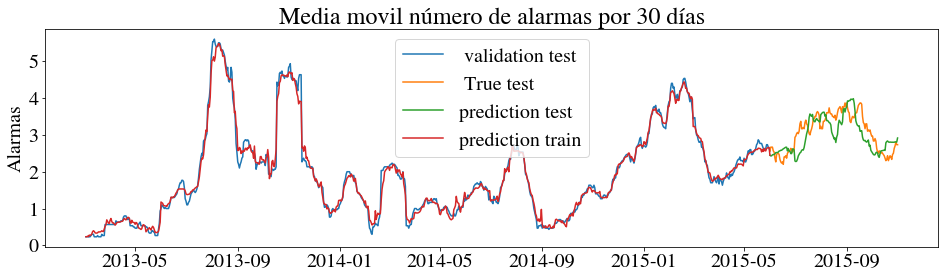

In [129]:
prediction_df_train = pd.DataFrame(data =best_model.predict(X_train),
                                   index=train.index, columns=['prediction'] )

prediction_df_test = pd.DataFrame(data =best_model.predict(X_test),
                                  index=test.index, columns=['prediction'] )

plt.figure(figsize=(16,4))
plt.plot(train[name_supermarker], label =' validation test')
plt.plot(test[name_supermarker], label =' True test')
plt.plot(prediction_df_test, label ='prediction test')
plt.plot(prediction_df_train, label ='prediction train')
plt.title("Media movil número de alarmas por 30 días")
plt.ylabel("Alarmas")
plt.yticks(np.arange(0,6,1));
plt.legend()

In [72]:
rmse = np.sqrt(mean_squared_error(train[name_supermarker], prediction_df_train['prediction']))
r2   = r2_score( train[name_supermarker] , prediction_df_train['prediction'] )

print(r2,rmse)

0.986240271528173 0.1446005887401763


In [73]:
rmse = np.sqrt(mean_squared_error(test[name_supermarker], prediction_df_test['prediction']))
r2   = r2_score( test[name_supermarker] , prediction_df_test['prediction'] )

print(r2,rmse)

0.4121439641021011 0.3808836449934038


### Se observa que las métricas en el conjunto de test mejoran en gran medida respecto al modelo base

<AxesSubplot:title={'center':'Feature importance'}>

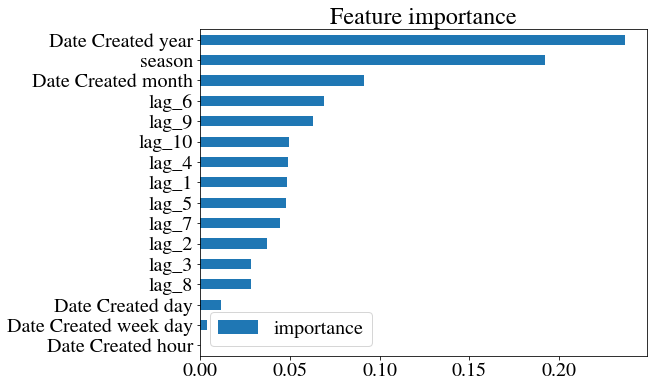

In [74]:
reg.feature_importances_
fi = pd.DataFrame(data = best_model.feature_importances_,
                  index=train.drop(name_supermarker, axis =1 ).columns,
                  columns=['importance'])

fi.sort_values(by= 'importance' ).plot(kind = 'barh', title = 'Feature importance')

<AxesSubplot:title={'center':'Importancia de las características'}>

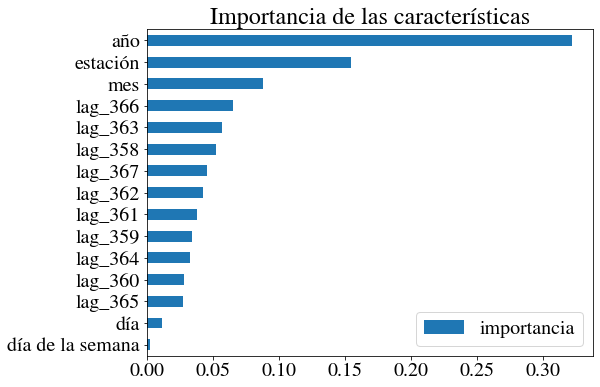

In [102]:
indexes = ['lag_358','lag_359','lag_360',
           'lag_361','lag_362','lag_363',
           'lag_364','lag_365','lag_366',
           'lag_367', 'año','mes', 'día',
           'hora', 'día de la semana', 'estación']

fi = pd.DataFrame(data = best_model.feature_importances_,
                  index=indexes,
                  columns=['importancia'])

fi.drop('hora', inplace=True)

fi.sort_values(by= 'importancia' ).plot(kind = 'barh', title = 'Importancia de las características')

## 5. Predicción del futuro

Para predecir el número de alarmas a 2016 se usa el mejor modelo de XGboost

In [79]:
all_data = df_rolling[~pd.isnull(df_rolling['lag_10'])] 

X_all = all_data.drop(name_supermarker, axis =1 ).values
y_all = all_data[name_supermarker].values

In [80]:
X_all[0]

array([9.33333333e-01, 1.00000000e+00, 1.33333333e+00, 1.33333333e+00,
       1.26666667e+00, 1.13333333e+00, 1.33333333e+00, 1.30000000e+00,
       1.46666667e+00, 1.43333333e+00, 2.01300000e+03, 3.00000000e+00,
       3.00000000e+00, 0.00000000e+00, 6.00000000e+00, 2.00000000e+00])

In [81]:
best_model.fit(X_all, y_all) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.5142920839279626, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.14371211001018525, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03318466831233196, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
             min_child_weight=9.416545944733079, missing=nan,
             monotone_constraints='()', n_estimators=303, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [82]:
all_data.index.max()

Timestamp('2015-11-01 00:00:00', freq='D')

In [83]:
def add_lags(df,target_map):    
    df['lag_1'] = (df.index - pd.Timedelta('358 days')).map(target_map )
    df['lag_2'] = (df.index - pd.Timedelta('359 days')).map(target_map )
    df['lag_3'] = (df.index - pd.Timedelta('360 days')).map(target_map )
    df['lag_4'] = (df.index - pd.Timedelta('361 days')).map(target_map )
    df['lag_5'] = (df.index - pd.Timedelta('362 days')).map(target_map )
    df['lag_6'] = (df.index - pd.Timedelta('363 days')).map(target_map )
    df['lag_7'] = (df.index - pd.Timedelta('364 days')).map(target_map )
    df['lag_8'] = (df.index - pd.Timedelta('365 days')).map(target_map )
    df['lag_9'] = (df.index - pd.Timedelta('366 days')).map(target_map )
    df['lag_10'] =(df.index - pd.Timedelta('367 days')).map(target_map )
    return df


def create_features(df):
    df['Date Created year']=df.index.year  #recupera el año  
    df['Date Created month']=df.index.month  #recupera el mes
    df['Date Created day']=df.index.day #recupera el número del día
    df['Date Created week day']=df.index.dayofweek #recupera el día nombre del dia de semana
    df['season'] = df['Date Created month']%12 // 3 + 1
    return df

In [84]:
target_map = df_rolling[name_supermarker].to_dict()

future_indexes = pd.date_range('2015-11-01', '2016-10-24', freq='1d')
future_df = pd.DataFrame(index = future_indexes)

future_df['isFuture'] = True
all_data['isFuture'] = False
test_and_future = pd.concat([all_data,future_df] )


test_and_future = create_features(test_and_future)
test_and_future = add_lags(test_and_future, target_map)


In [85]:
test_and_future

,A0052,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,Date Created year,Date Created month,Date Created day,Date Created hour,Date Created week day,season,isFuture
2013-03-03,0.233333,0.933333,1.000000,1.333333,1.333333,1.266667,1.133333,1.333333,1.300000,1.466667,1.433333,2013,3,3,0,6,2,False
2013-03-04,0.233333,0.933333,0.933333,1.000000,1.333333,1.333333,1.266667,1.133333,1.333333,1.300000,1.466667,2013,3,4,0,0,2,False
2013-03-05,0.233333,0.933333,0.933333,0.933333,1.000000,1.333333,1.333333,1.266667,1.133333,1.333333,1.300000,2013,3,5,0,1,2,False
2013-03-06,0.233333,1.100000,0.933333,0.933333,0.933333,1.000000,1.333333,1.333333,1.266667,1.133333,1.333333,2013,3,6,0,2,2,False
2013-03-07,0.233333,1.100000,1.100000,0.933333,0.933333,0.933333,1.000000,1.333333,1.333333,1.266667,1.133333,2013,3,7,0,3,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-20,NaN,2.633333,2.500000,2.466667,2.333333,2.400000,2.433333,2.366667,2.300000,2.433333,2.333333,2016,10,20,0,3,4,True
2016-10-21,NaN,2.700000,2.633333,2.500000,2.466667,2.333333,2.400000,2.433333,2.366667,2.300000,2.433333,2016,10,21,0,4,4,True
2016-10-22,NaN,2.800000,2.700000,2.633333,2.500000,2.466667,2.333333,2.400000,2.433333,2.366667,2.300000,2016,10,22,0,5,4,True
2016-10-23,NaN,2.733333,2.800000,2.700000,2.633333,2.500000,2.466667,2.333333,2.400000,2.433333,2.366667,2016,10,23,0,6,4,True


In [86]:
future_w_features = test_and_future.query('isFuture').copy()
future_w_features

,A0052,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,Date Created year,Date Created month,Date Created day,Date Created hour,Date Created week day,season,isFuture
2015-11-01,NaN,1.333333,1.366667,1.400000,1.400000,1.400000,1.566667,1.633333,1.566667,1.566667,1.600000,2015,11,1,0,6,4,True
2015-11-02,NaN,1.333333,1.333333,1.366667,1.400000,1.400000,1.400000,1.566667,1.633333,1.566667,1.566667,2015,11,2,0,0,4,True
2015-11-03,NaN,1.266667,1.333333,1.333333,1.366667,1.400000,1.400000,1.400000,1.566667,1.633333,1.566667,2015,11,3,0,1,4,True
2015-11-04,NaN,1.266667,1.266667,1.333333,1.333333,1.366667,1.400000,1.400000,1.400000,1.566667,1.633333,2015,11,4,0,2,4,True
2015-11-05,NaN,1.266667,1.266667,1.266667,1.333333,1.333333,1.366667,1.400000,1.400000,1.400000,1.566667,2015,11,5,0,3,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-20,NaN,2.633333,2.500000,2.466667,2.333333,2.400000,2.433333,2.366667,2.300000,2.433333,2.333333,2016,10,20,0,3,4,True
2016-10-21,NaN,2.700000,2.633333,2.500000,2.466667,2.333333,2.400000,2.433333,2.366667,2.300000,2.433333,2016,10,21,0,4,4,True
2016-10-22,NaN,2.800000,2.700000,2.633333,2.500000,2.466667,2.333333,2.400000,2.433333,2.366667,2.300000,2016,10,22,0,5,4,True
2016-10-23,NaN,2.733333,2.800000,2.700000,2.633333,2.500000,2.466667,2.333333,2.400000,2.433333,2.366667,2016,10,23,0,6,4,True


In [89]:
features = list(df_rolling.columns)

features.remove(name_supermarker)
#features.remove('unrolled)
print(features)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'Date Created year', 'Date Created month', 'Date Created day', 'Date Created hour', 'Date Created week day', 'season']


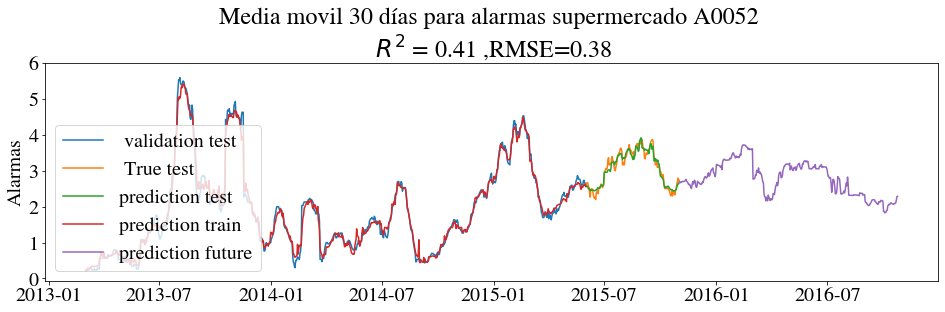

In [96]:
best_model.predict( future_w_features[features]) 

prediction_df_train = pd.DataFrame(data =best_model.predict(X_train),
                                   index=train.index, columns=['prediction'] )

prediction_df_test = pd.DataFrame(data =best_model.predict(X_test),
                                  index=test.index, columns=['prediction'] )

prediction_df_future = pd.DataFrame(data =best_model.predict(future_w_features[features]),
                                  index=future_w_features.index, columns=['prediction'] )

plt.figure(figsize=(16,4))
plt.plot(train[name_supermarker], label =' validation test')
plt.plot(test[name_supermarker], label =' True test')
plt.plot(prediction_df_test, label ='prediction test')
plt.plot(prediction_df_train, label ='prediction train')
plt.plot(prediction_df_future, label ='prediction future')
plt.title(f"Media movil 30 días para alarmas supermercado A0052 \n $R^2$ = {r2:.2f} ,RMSE={rmse:.2f}")
plt.ylabel("Alarmas")
plt.yticks(np.arange(0,7))
plt.legend(loc ='lower left' )

## 6. Predicción de otros supermercados

In [131]:
def time_series(name_supermarker):

    #construyendo el dataset
    df_supermarker = df_site_number_TS_Unstacked[[name_supermarker]]
    df_supermarker.columns.name = None #Elimna el multiindex

    df_1d = df_supermarker.reset_index().groupby(by= pd.Grouper(key='Date Created',freq='1d') )[[name_supermarker]].sum()
    df_rolling = df_1d[[name_supermarker]].rolling(30).mean()

    #agregando características
    target_map = df_rolling[name_supermarker].to_dict()
    
    
    df_rolling['lag_1'] = (df_rolling.index - pd.Timedelta('358 days')).map(target_map )
    df_rolling['lag_2'] = (df_rolling.index - pd.Timedelta('359 days')).map(target_map )
    df_rolling['lag_3'] = (df_rolling.index - pd.Timedelta('360 days')).map(target_map )
    df_rolling['lag_4'] = (df_rolling.index - pd.Timedelta('361 days')).map(target_map )
    df_rolling['lag_5'] = (df_rolling.index - pd.Timedelta('362 days')).map(target_map )
    df_rolling['lag_6'] = (df_rolling.index - pd.Timedelta('363 days')).map(target_map )
    df_rolling['lag_7'] = (df_rolling.index - pd.Timedelta('364 days')).map(target_map )
    df_rolling['lag_8'] = (df_rolling.index - pd.Timedelta('365 days')).map(target_map )
    df_rolling['lag_9'] = (df_rolling.index - pd.Timedelta('366 days')).map(target_map )
    df_rolling['lag_10'] = (df_rolling.index - pd.Timedelta('367 days')).map(target_map )

    df_rolling['Date Created year']=df_rolling.index.year  #recupera el año  
    df_rolling['Date Created month']=df_rolling.index.month  #recupera el mes
    df_rolling['Date Created day']=df_rolling.index.day #recupera el número del día
    df_rolling['Date Created hour']=df_rolling.index.hour #recupera la hora
    df_rolling['Date Created week day']=df_rolling.index.dayofweek #recupera el día nombre del dia de semana
    df_rolling['season'] = df_rolling['Date Created month']%12 // 3 + 1
    
    features = list(df_rolling.columns)
    features.remove(name_supermarker)

    train = df_rolling.loc[df_1d.index <= '2015-01']
    train = train[~pd.isnull(train['lag_10'])]

    test =  df_rolling.loc[df_1d.index >= '2015-01']

    X_train = train[features].values
    y_train = train[name_supermarker].values

    X_test = test[features].values
    y_test = test[name_supermarker].values
    
    
    best_model = xgb.XGBRegressor(**study.best_params) #xgb.XGBRegressor()
    #best_model.load_model("best_model_alarms-XGBoost-5.json")
    best_model.fit(X_train, y_train)

    #Realizando predicciones
    prediction_df_train = pd.DataFrame(data =best_model.predict(X_train),
                                       index=train.index, columns=['prediction'] )

    prediction_df_test = pd.DataFrame(data =best_model.predict(X_test),
                                      index=test.index, columns=['prediction'] )
    #Evaluando resultados
    rmse = np.sqrt(mean_squared_error(test[name_supermarker], prediction_df_test['prediction']))
    r2   = r2_score( test[name_supermarker] , prediction_df_test['prediction'] )
    
    
    #Graficando resultados
    prediction_df_train = pd.DataFrame(data =best_model.predict(X_train),
                                       index=train.index, columns=['prediction'] )

    prediction_df_test = pd.DataFrame(data =best_model.predict(X_test),
                                      index=test.index, columns=['prediction'] )

    plt.figure(figsize=(16,4))
    plt.plot(train[name_supermarker], label ='train test')
    plt.plot(test[name_supermarker], label =' True test')
    plt.plot(prediction_df_train, label ='prediction train')
    plt.plot(prediction_df_test, label ='prediction test')
    plt.title("mean number of alarms in seven days")
    plt.legend()

    print(f'the R^2 is {r2:.2f} and the RMSE is {rmse:.2f} ')

In [498]:
prediction_df_test['prediction'].min(), prediction_df_test['prediction'].max()

(2.440635919570923, 3.9169700145721436)

the R^2 is -0.53 and the RMSE is 2.49 


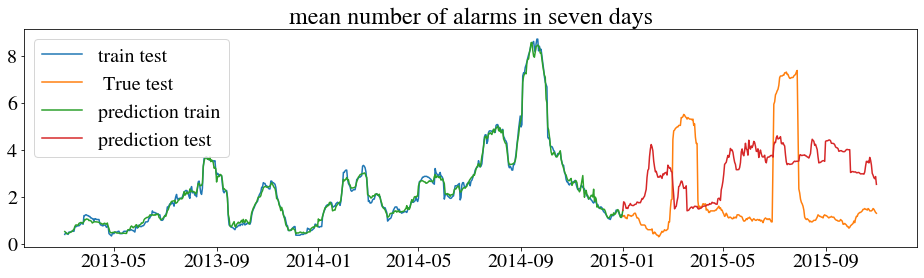

In [499]:
time_series(name_supermarker = 'A0670') 

the R^2 is -286.75 and the RMSE is 7.48 


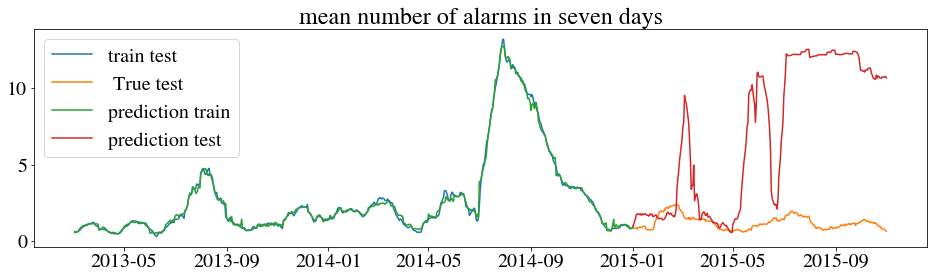

In [500]:
time_series(name_supermarker = 'A0815') 

the R^2 is -0.77 and the RMSE is 1.57 


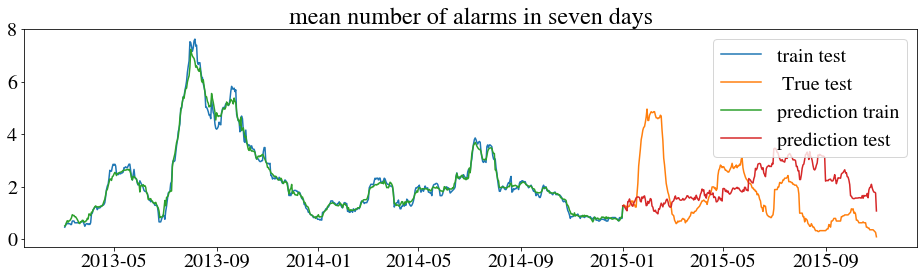

In [501]:
time_series(name_supermarker = 'A0440') 

the R^2 is -0.53 and the RMSE is 2.49 


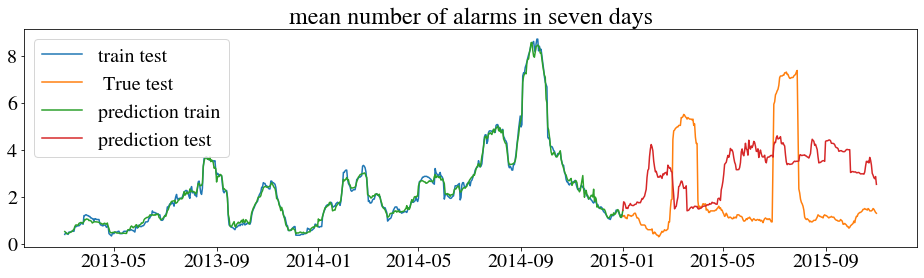

In [502]:
time_series(name_supermarker = 'A0670') 

the R^2 is -4.00 and the RMSE is 1.55 


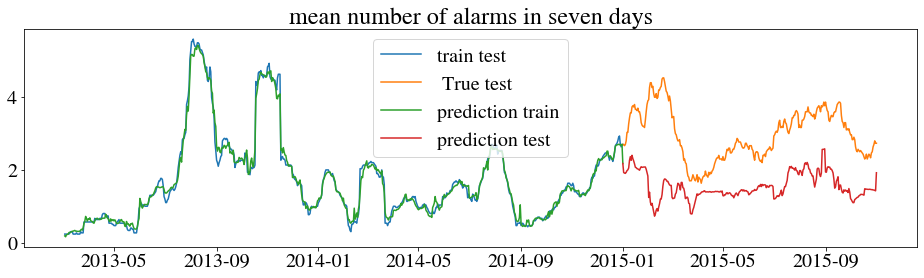

In [503]:
time_series(name_supermarker = 'A0052') 

the R^2 is -61.10 and the RMSE is 0.10 


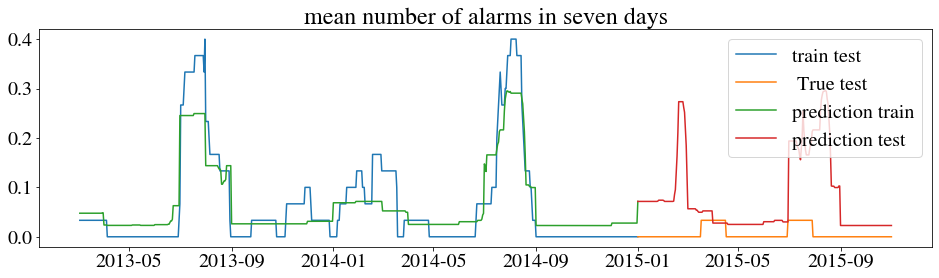

In [506]:
time_series(name_supermarker = 'P2244')    

the R^2 is -41.21 and the RMSE is 0.13 


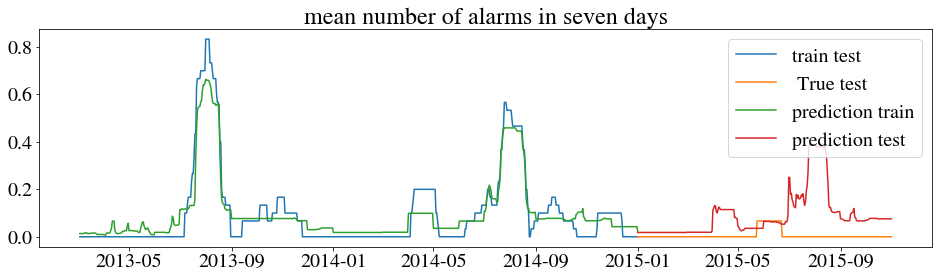

In [491]:
time_series(name_supermarker = 'P2136')    

the R^2 is -0.23 and the RMSE is 0.51 


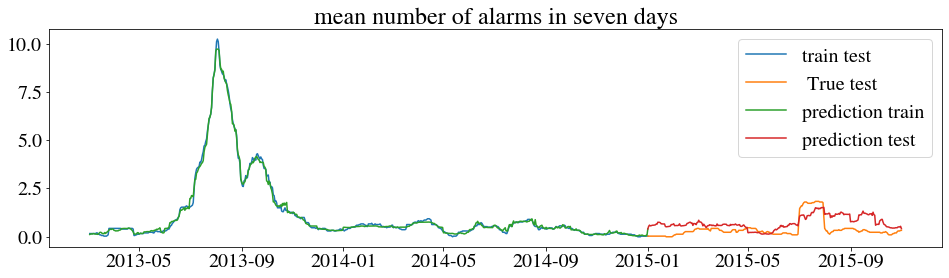

In [493]:
time_series(name_supermarker = 'A0009')  

### Se observa que no es posible poseer un solo modelo para realizar las predicciones debido a la heterogeneidad de las series de tiempo, de tal manera que se opta por realizar un modelo para para serie de tiempo con el fin de maximizar los valores de $R^2$

## 7. Mejoras futuras

- Implementación de multi-output (https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.RegressorChain.html)


- Implementación de ensamble de algoritmos, Regresión multilineal + XGboost


- Uso de otras características para el modelo como festividades